# Análisis Exploratorio de Datos (EDA)
## Producción de Gas Natural en Colombia

---

### Metodologías Aplicadas:
- **CRISP-DM** (Cross-Industry Standard Process for Data Mining)
- **OSEMN** (Obtain, Scrub, Explore, Model, iNterpret)

---

**Autores:** Gia Mariana Calle Higuita - José Santiago Molano Perdomo - Juan José Restrepo Higuita

**Fecha:** 30 de enero de 2026

**Dataset:** [Producción Fiscalizada de Gas Natural](https://www.datos.gov.co) de la página de Datos Abiertos de Colombia. Este conjunto de datos contiene información histórica sobre la producción de gas natural en Colombia desde 2014 hasta 2025, organizada por departamento, municipio, operadora y campo de producción.

---

## FASE 1: BUSINESS UNDERSTANDING (CRISP-DM)

### Contexto del Negocio

El sector energético colombiano es fundamental para el desarrollo económico del país. Este análisis explora la producción de gas natural, un recurso estratégico que impacta directamente la seguridad energética nacional y el desarrollo industrial.

El gas natural es utilizado en Colombia para:
- Generación de energía eléctrica
- Consumo residencial (cocción y calefacción)
- Industria (petroquímica, cemento, vidrio)
- Transporte (Gas Natural Vehicular - GNV)

### Objetivos del Negocio

1. **Análisis de Competitividad:** ¿Qué operadoras lideran la producción de gas natural?
2. **Segmentación Geográfica:** ¿Dónde se concentra la producción?
3. **Identificación de Patrones:** ¿Cómo ha evolucionado la producción en el tiempo?
4. **Análisis de Contratos:** ¿Qué tipos de contratos son más productivos?
5. **Distribución por Campo:** ¿Cuáles son los campos más importantes?

### Preguntas de Negocio Clave

**Producción y Operadores:**
- ¿Qué operadoras producen más gas natural en Colombia?
- ¿Cuál es la concentración del mercado?
- ¿Cómo ha evolucionado la participación de las operadoras?

**Distribución Geográfica:**
- ¿Qué departamentos producen más gas?
- ¿Existen diferencias regionales significativas?
- ¿Cómo se distribuyen los campos productivos?

**Tendencias Temporales:**
- ¿Cómo ha evolucionado la producción total?
- ¿Existen patrones estacionales?
- ¿Hay tendencias de crecimiento o decrecimiento?

**Tipos de Contrato:**
- ¿Qué tipos de contratos generan más producción?
- ¿Cómo se distribuyen los contratos entre operadoras?

**Campos Productivos:**
- ¿Cuáles son los campos más productivos?
- ¿Hay concentración en pocos campos?
- ¿Qué campos están en declive o crecimiento?

---

## FASE 2: DATA UNDERSTANDING & OBTAIN (CRISP-DM / OSEMN)

### Obtención y Comprensión de los Datos

In [7]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Librerías cargadas correctamente")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

Librerías cargadas correctamente
Pandas version: 3.0.0
Numpy version: 2.4.1


### Carga del Dataset

In [8]:
# Cargar Dataset: Producción de Gas Natural
print("=" * 80)
print("DATASET: PRODUCCIÓN FISCALIZADA DE GAS NATURAL")
print("=" * 80)

try:
    # Nota: Este dataset usa coma como separador decimal
    df_gas = pd.read_csv('datasets/gas-production.csv', decimal=',')
    print(f"Dataset cargado exitosamente")
    print(f"Dimensiones: {df_gas.shape[0]:,} filas x {df_gas.shape[1]} columnas")
    print("\nColumnas: " + ', '.join(df_gas.columns))
except Exception as e:
    print(f"Error al cargar: {e}")

DATASET: PRODUCCIÓN FISCALIZADA DE GAS NATURAL
Dataset cargado exitosamente
Dimensiones: 70,968 filas x 15 columnas

Columnas: Vigencia, Mes, NombreMes, CodDaneDepartamento, Departamento, CodDaneMunicipio, Municipio, Operadora, Contrato, Tipo Contrato, Campo, Longitud, Latitud, ProduccionKpc, Geolocalizacion


### Exploración Inicial del Dataset

In [9]:
# Estructura del dataset
print("ESTRUCTURA DEL DATASET")
print("-" * 80)
df_gas.info()

ESTRUCTURA DEL DATASET
--------------------------------------------------------------------------------
<class 'pandas.DataFrame'>
RangeIndex: 70968 entries, 0 to 70967
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Vigencia             67696 non-null  float64
 1   Mes                  67696 non-null  float64
 2   NombreMes            67696 non-null  str    
 3   CodDaneDepartamento  67696 non-null  float64
 4   Departamento         67696 non-null  str    
 5   CodDaneMunicipio     67696 non-null  float64
 6   Municipio            67696 non-null  str    
 7   Operadora            67696 non-null  str    
 8   Contrato             67696 non-null  str    
 9   Tipo Contrato        67696 non-null  str    
 10  Campo                64424 non-null  str    
 11  Longitud             70968 non-null  str    
 12  Latitud              70968 non-null  str    
 13  ProduccionKpc        64424 non-null  float6

In [10]:
# Muestra de datos
print("\nMUESTRA DE DATOS (primeras 5 filas):")
df_gas.head()


MUESTRA DE DATOS (primeras 5 filas):


,Vigencia,Mes,NombreMes,CodDaneDepartamento,Departamento,CodDaneMunicipio,Municipio,Operadora,Contrato,Tipo Contrato,Campo,Longitud,Latitud,ProduccionKpc,Geolocalizacion
0,2014.00,1.00,Enero,5.00,ANTIOQUIA,5002.00,ABEJORRAL,KAPPA RESOURCES COLOMBIA LTD.,ABANICO,CONVENIOS DE EXPLORACIÓN Y EXPLOTACIÓN,ABANICO,-74.88020793,4.219056,0.00,POINT (-74.88020793 4.219056)
1,2014.00,2.00,Febrero,5.00,ANTIOQUIA,5002.00,ABEJORRAL,KAPPA RESOURCES COLOMBIA LTD.,ABANICO,CONVENIOS DE EXPLORACIÓN Y EXPLOTACIÓN,ABANICO,-74.88020793,4.219056,0.00,POINT (-74.88020793 4.219056)
2,2014.00,3.00,Marzo,5.00,ANTIOQUIA,5002.00,ABEJORRAL,KAPPA RESOURCES COLOMBIA LTD.,ABANICO,CONVENIOS DE EXPLORACIÓN Y EXPLOTACIÓN,ABANICO,-74.88020793,4.219056,0.00,POINT (-74.88020793 4.219056)
3,2014.00,1.00,Enero,5.00,ANTIOQUIA,5585.00,PUERTO NARE,ECOPETROL S.A.,OPERACION-DIRECTA ECOPETROL,CONVENIOS DE EXPLOTACIÓN,AREA TECA-COCORNA,-74.611941,6.032039,6209.00,POINT (-74.611941 6.032039)
4,2014.00,1.00,Enero,5.00,ANTIOQUIA,5591.00,PUERTO TRIUNFO,ECOPETROL S.A.,OPERACION-DIRECTA ECOPETROL,CONVENIOS DE EXPLOTACIÓN,AREA TECA-COCORNA,-74.611941,6.032039,6275.00,POINT (-74.611941 6.032039)


In [11]:
# Identificación de tipos de variables
print("\nCLASIFICACIÓN DE VARIABLES")
print("-" * 80)

# Variables numéricas
numericas_gas = df_gas.select_dtypes(include=[np.number]).columns.tolist()
print(f"\nVariables Numéricas ({len(numericas_gas)}):")
for col in numericas_gas:
    print(f"  - {col}")

# Variables categóricas/texto
categoricas_gas = df_gas.select_dtypes(include=['object']).columns.tolist()
print(f"\nVariables Categóricas/Texto ({len(categoricas_gas)}):")
for col in categoricas_gas:
    print(f"  - {col} (valores únicos: {df_gas[col].nunique()})")


CLASIFICACIÓN DE VARIABLES
--------------------------------------------------------------------------------

Variables Numéricas (5):
  - Vigencia
  - Mes
  - CodDaneDepartamento
  - CodDaneMunicipio
  - ProduccionKpc

Variables Categóricas/Texto (10):
  - NombreMes (valores únicos: 12)
  - Departamento (valores únicos: 24)
  - Municipio (valores únicos: 142)
  - Operadora (valores únicos: 88)
  - Contrato (valores únicos: 224)
  - Tipo Contrato (valores únicos: 11)
  - Campo (valores únicos: 620)
  - Longitud (valores únicos: 513)
  - Latitud (valores únicos: 513)
  - Geolocalizacion (valores únicos: 513)


In [12]:
# Calidad de datos - Valores nulos
print("\nCALIDAD DE DATOS - VALORES NULOS")
print("-" * 80)
nulos_gas = df_gas.isnull().sum()
if nulos_gas.sum() == 0:
    print("No se detectaron valores nulos en el dataset")
else:
    print(f"Total de valores nulos: {nulos_gas.sum()}")
    print("\nColumnas con nulos:")
    print(nulos_gas[nulos_gas > 0])

# Rango temporal del dataset
print("\nRANGO TEMPORAL")
print("-" * 80)
print(f"Año inicial: {int(df_gas['Vigencia'].min())}")
print(f"Año final: {int(df_gas['Vigencia'].max())}")
print(f"Período cubierto: {int(df_gas['Vigencia'].max() - df_gas['Vigencia'].min())} Años")


CALIDAD DE DATOS - VALORES NULOS
--------------------------------------------------------------------------------
Total de valores nulos: 45808

Columnas con nulos:
Vigencia               3272
Mes                    3272
NombreMes              3272
CodDaneDepartamento    3272
Departamento           3272
CodDaneMunicipio       3272
Municipio              3272
Operadora              3272
Contrato               3272
Tipo Contrato          3272
Campo                  6544
ProduccionKpc          6544
dtype: int64

RANGO TEMPORAL
--------------------------------------------------------------------------------
Año inicial: 2014
Año final: 2025
Período cubierto: 11 Años


---

## FASE 3: DATA PREPARATION & SCRUB (CRISP-DM / OSEMN)

### Limpieza y Preparación de Datos

In [13]:
# Crear copia del dataset para trabajar
df = df_gas.copy()

# Eliminar filas con valores nulos en columnas críticas
nulos_antes = len(df)
df = df.dropna(subset=['Vigencia', 'Mes', 'ProduccionKpc', 'Campo'])
nulos_despues = len(df)
print(f"Registros eliminados por nulos en columnas críticas: {nulos_antes - nulos_despues:,}")

# Convertir Vigencia y Mes a enteros
df['Vigencia'] = df['Vigencia'].astype(int)
df['Mes'] = df['Mes'].astype(int)

# Convertir Longitud y Latitud a numerico (pueden estar como texto con comas)
df['Longitud'] = pd.to_numeric(df['Longitud'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)
df['Latitud'] = pd.to_numeric(df['Latitud'].astype(str).str.replace(',', '.'), errors='coerce').fillna(0)

print(f"\nDataset limpio para análisis")
print(f"Dimensiones: {df.shape}")

Registros eliminados por nulos en columnas críticas: 6,544

Dataset limpio para análisis
Dimensiones: (64424, 15)


In [14]:
# Verificar tipos de datos después de limpieza
print("\nVERIFICACIÓN DE TIPOS DE DATOS")
print("-" * 80)

print("\nColumnas clave:")
for col in ['Vigencia', 'Mes', 'ProduccionKpc', 'Longitud', 'Latitud']:
    print(f"  {col}: {df[col].dtype}")

print(f"\nRango de Longitud: [{df['Longitud'].min():.4f}, {df['Longitud'].max():.4f}]")
print(f"Rango de Latitud: [{df['Latitud'].min():.4f}, {df['Latitud'].max():.4f}]")


VERIFICACIÓN DE TIPOS DE DATOS
--------------------------------------------------------------------------------

Columnas clave:
  Vigencia: int64
  Mes: int64
  ProduccionKpc: float64
  Longitud: float64
  Latitud: float64

Rango de Longitud: [-77.1660, 0.0000]
Rango de Latitud: [0.0000, 11.8111]


In [15]:
# Crear variables derivadas útiles para análisis
print("\nCREACIÓN DE VARIABLES DERIVADAS")
print("=" * 80)

# Variable binaria: Hubo producción?
df['ProduccionActiva'] = (df['ProduccionKpc'] > 0).astype(int)

# Variable binaria: Coordenadas válidas?
df['CoordenadasValidas'] = ~((df['Longitud'] == 0) & (df['Latitud'] == 0))

# Crear columna de fecha (primera del mes)
df['Fecha'] = pd.to_datetime({
    'year': df['Vigencia'],
    'month': df['Mes'],
    'day': 1
}, errors='coerce')

# Crear nombres de meses en español
meses_dict = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
df['NombreMes'] = df['Mes'].map(meses_dict)

print("Variable 'ProduccionActiva' creada")
print("Variable 'CoordenadasValidas' creada")
print("Variable 'Fecha' creada")
print("Variable 'NombreMes' creada")

print(f"\nNuevas dimensiones: {df.shape}")


CREACIÓN DE VARIABLES DERIVADAS
Variable 'ProduccionActiva' creada
Variable 'CoordenadasValidas' creada
Variable 'Fecha' creada
Variable 'NombreMes' creada

Nuevas dimensiones: (64424, 18)


In [16]:
# Resumen de calidad de datos después de preparación
print("\nRESUMEN DE CALIDAD DE DATOS")
print("=" * 80)
print(f"Total de registros: {len(df):,}")
print(f"Registros con producción activa: {df['ProduccionActiva'].sum():,} ({df['ProduccionActiva'].mean()*100:.1f}%)")
print(f"Registros con coordenadas validas: {df['CoordenadasValidas'].sum():,} ({df['CoordenadasValidas'].mean()*100:.1f}%)")
print(f"\nRango de fechas: {df['Fecha'].min().strftime('%Y-%m')} a {df['Fecha'].max().strftime('%Y-%m')}")


RESUMEN DE CALIDAD DE DATOS
Total de registros: 64,424
Registros con producción activa: 36,366 (56.4%)
Registros con coordenadas validas: 57,517 (89.3%)

Rango de fechas: 2014-01 a 2025-09


---

## FASE 4: EXPLORE - ANÁLISIS EXPLORATORIO (OSEMN)

### Exploración Profunda de los Datos

In [17]:
# Estadísticos descriptivos de la variable principal: ProduccionKpc
print("\nESTADÍSTICOS DESCRIPTIVOS - PRODUCCIÓN DE GAS (Kpc)")
print("=" * 80)

# Filtrar solo registros con producción activa para estadisticos
produccion_activa = df[df['ProduccionKpc'] > 0]['ProduccionKpc']

stats = pd.DataFrame({
    'Metrica': ['Media', 'Mediana', 'Desv. Estandar', 'Minimo', 'Q1 (25%)', 'Q3 (75%)', 'Maximo', 'Rango'],
    'Valor': [
        produccion_activa.mean(),
        produccion_activa.median(),
        produccion_activa.std(),
        produccion_activa.min(),
        produccion_activa.quantile(0.25),
        produccion_activa.quantile(0.75),
        produccion_activa.max(),
        produccion_activa.max() - produccion_activa.min()
    ]
})

stats['Valor'] = stats['Valor'].apply(lambda x: f"{x:,.2f}")
print(stats.to_string(index=False))

print(f"\nNota: Estadísticos calculados sobre {len(produccion_activa):,} registros con producción activa")
print(f"      (excluyendo {(df['ProduccionKpc'] == 0).sum():,} registros con producción = 0)")


ESTADÍSTICOS DESCRIPTIVOS - PRODUCCIÓN DE GAS (Kpc)
       Metrica         Valor
         Media    230,175.04
       Mediana      6,006.50
Desv. Estandar  1,191,688.91
        Minimo          0.02
      Q1 (25%)      1,039.18
      Q3 (75%)     31,839.74
        Maximo 19,240,969.00
         Rango 19,240,968.98

Nota: Estadísticos calculados sobre 36,366 registros con producción activa
      (excluyendo 28,058 registros con producción = 0)


#### 4.1.2 Distribucion de la Producción

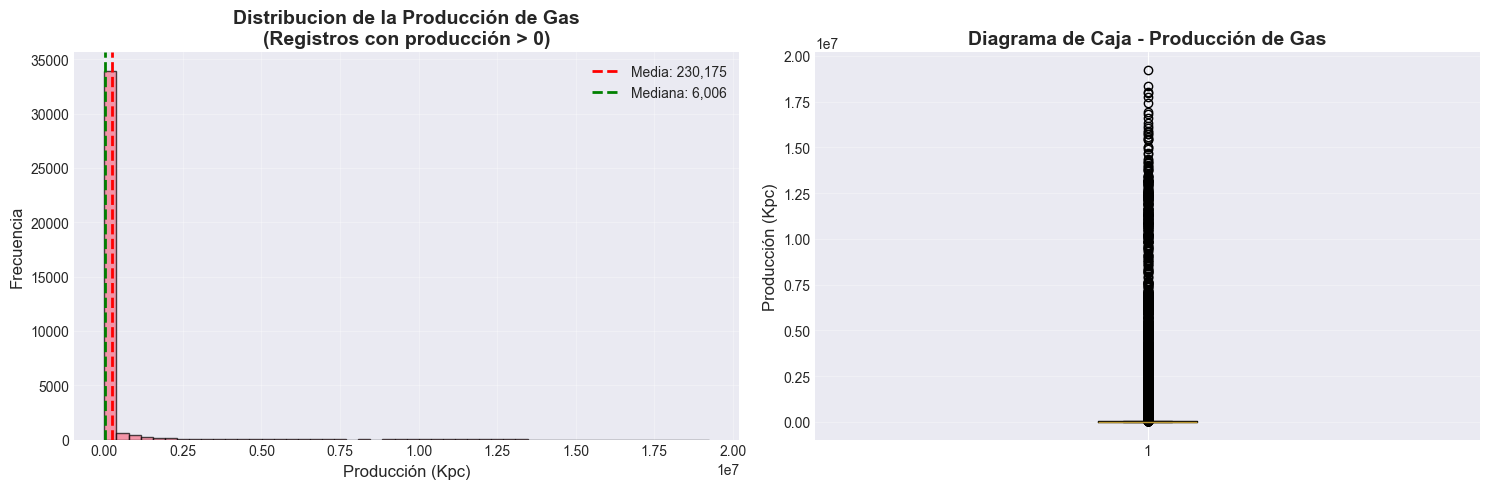


INTERPRETACIÓN:
--------------------------------------------------------------------------------
La distribución de producción muestra asimetría positiva (sesgo a la derecha)
La mayoría de los campos tienen producción baja-media
Existen outliers con producción muy alta (campos grandes)
La diferencia entre media y mediana indica presencia de valores extremos


In [18]:
# Visualización: Histograma y boxplot de producción
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
axes[0].hist(produccion_activa, bins=50, edgecolor='black', alpha=0.7)
axes[0].axvline(produccion_activa.mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {produccion_activa.mean():,.0f}')
axes[0].axvline(produccion_activa.median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: {produccion_activa.median():,.0f}')
axes[0].set_xlabel('Producción (Kpc)', fontsize=12)
axes[0].set_ylabel('Frecuencia', fontsize=12)
axes[0].set_title('Distribucion de la Producción de Gas\n(Registros con producción > 0)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(produccion_activa, vert=True)
axes[1].set_ylabel('Producción (Kpc)', fontsize=12)
axes[1].set_title('Diagrama de Caja - Producción de Gas', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nINTERPRETACIÓN:")
print("-" * 80)
print("La distribución de producción muestra asimetría positiva (sesgo a la derecha)")
print("La mayoría de los campos tienen producción baja-media")
print("Existen outliers con producción muy alta (campos grandes)")
print("La diferencia entre media y mediana indica presencia de valores extremos")

#### 4.1.3 Análisis de Correlaciones


ANÁLISIS DE CORRELACIONES

Matriz de Correlación:
               Vigencia   Mes  ProduccionKpc  Longitud  Latitud
Vigencia           1.00 -0.06          -0.04     -0.01     0.05
Mes               -0.06  1.00          -0.00      0.00    -0.00
ProduccionKpc     -0.04 -0.00           1.00      0.03     0.06
Longitud          -0.01  0.00           0.03      1.00     0.28
Latitud            0.05 -0.00           0.06      0.28     1.00


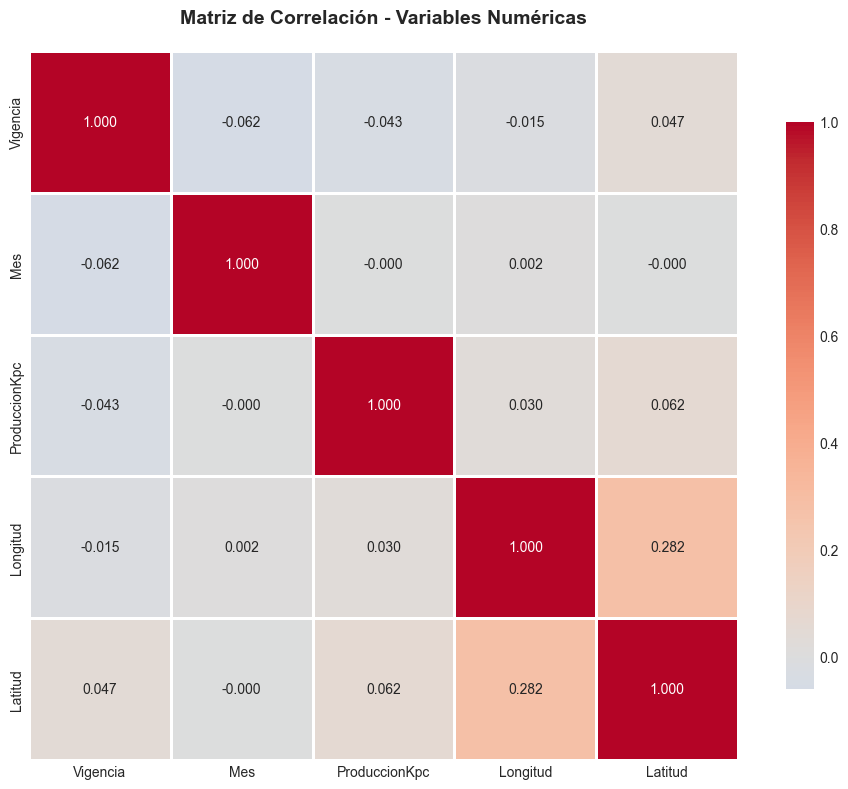


INTERPRETACIÓN:
--------------------------------------------------------------------------------
Correlaciones cercanas a 1 o -1 indican relación lineal fuerte
Correlaciones cercanas a 0 indican independencia lineal
Importante: La correlación no implica causalidad


In [19]:
# Análisis de correlaciones entre variables numéricas
print("\nANÁLISIS DE CORRELACIONES")
print("=" * 80)

vars_numericas = ['Vigencia', 'Mes', 'ProduccionKpc', 'Longitud', 'Latitud']
df_corr = df[vars_numericas].copy()
df_corr_validas = df_corr[(df['Longitud'] != 0) & (df['Latitud'] != 0)]

corr_matrix = df_corr_validas.corr()

print("\nMatriz de Correlación:")
print(corr_matrix.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\nINTERPRETACIÓN:")
print("-" * 80)
print("Correlaciones cercanas a 1 o -1 indican relación lineal fuerte")
print("Correlaciones cercanas a 0 indican independencia lineal")
print("Importante: La correlación no implica causalidad")

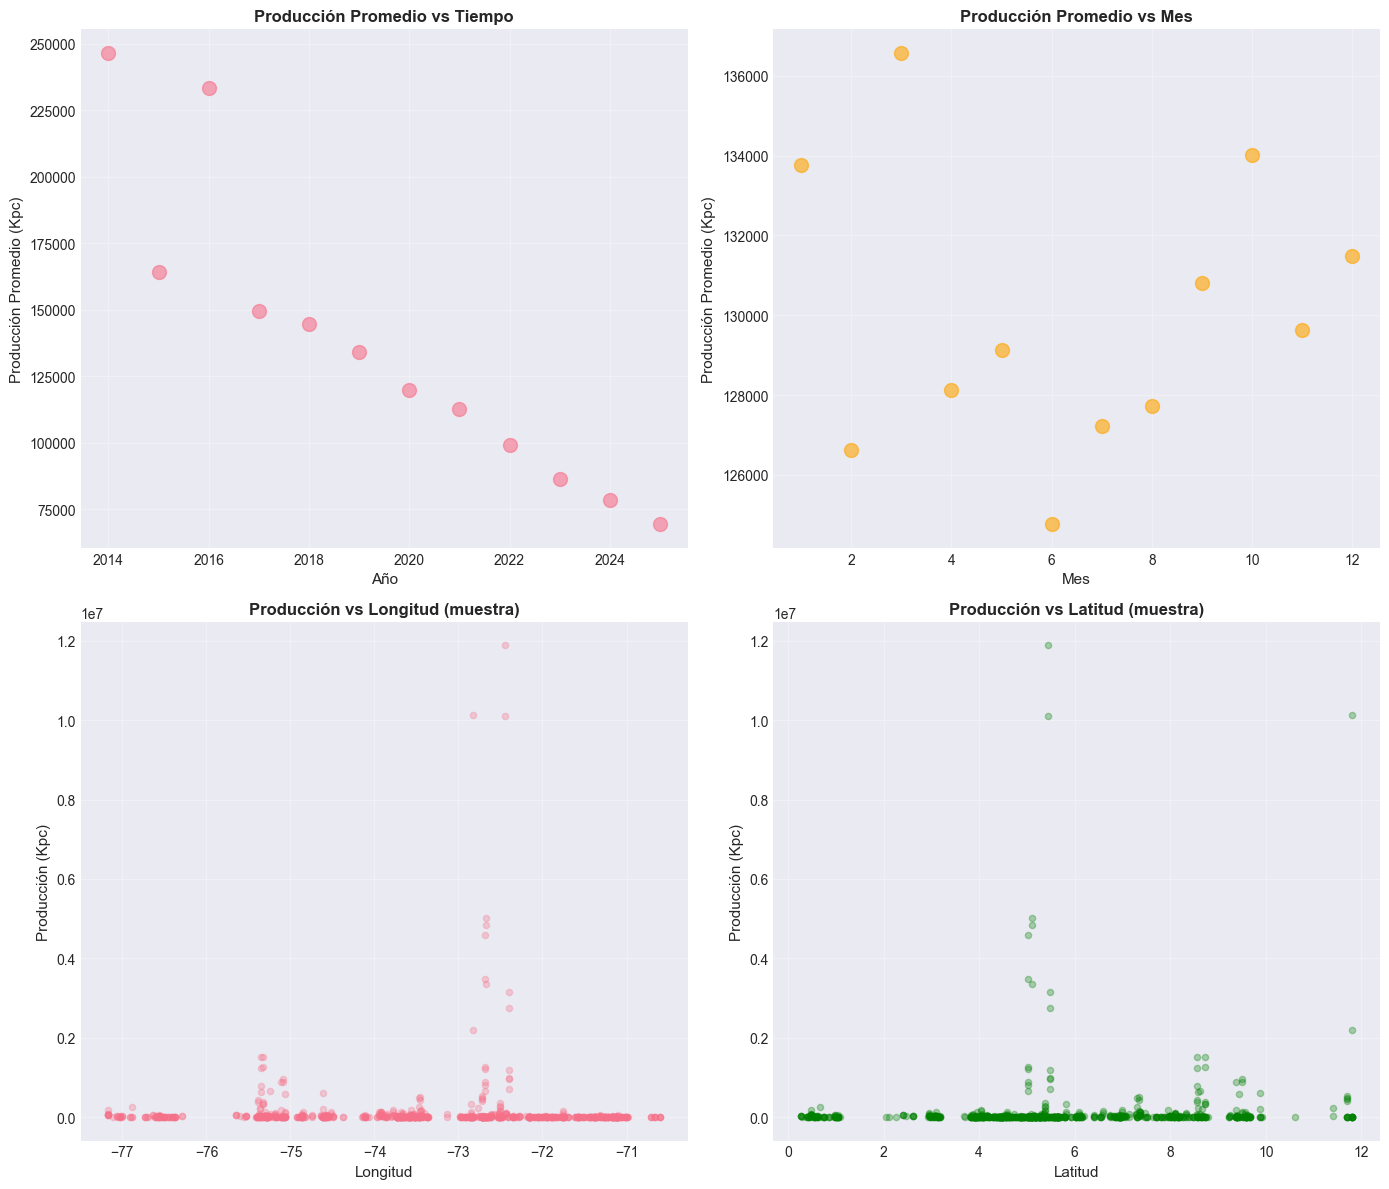

In [20]:
# Scatter plots de relaciones clave
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

df_prod_year = df.groupby('Vigencia')['ProduccionKpc'].mean()
axes[0, 0].scatter(df_prod_year.index, df_prod_year.values, alpha=0.6, s=100)
axes[0, 0].set_xlabel('Año', fontsize=11)
axes[0, 0].set_ylabel('Producción Promedio (Kpc)', fontsize=11)
axes[0, 0].set_title('Producción Promedio vs Tiempo', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

df_prod_mes = df.groupby('Mes')['ProduccionKpc'].mean()
axes[0, 1].scatter(df_prod_mes.index, df_prod_mes.values, alpha=0.6, s=100, color='orange')
axes[0, 1].set_xlabel('Mes', fontsize=11)
axes[0, 1].set_ylabel('Producción Promedio (Kpc)', fontsize=11)
axes[0, 1].set_title('Producción Promedio vs Mes', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

df_sample = df[df['CoordenadasValidas']].sample(min(1000, len(df[df['CoordenadasValidas']])), random_state=42)
axes[1, 0].scatter(df_sample['Longitud'], df_sample['ProduccionKpc'], alpha=0.3, s=20)
axes[1, 0].set_xlabel('Longitud', fontsize=11)
axes[1, 0].set_ylabel('Producción (Kpc)', fontsize=11)
axes[1, 0].set_title('Producción vs Longitud (muestra)', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].scatter(df_sample['Latitud'], df_sample['ProduccionKpc'], alpha=0.3, s=20, color='green')
axes[1, 1].set_xlabel('Latitud', fontsize=11)
axes[1, 1].set_ylabel('Producción (Kpc)', fontsize=11)
axes[1, 1].set_title('Producción vs Latitud (muestra)', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 4.1.4 Segmentacion de Campos por Tamano de Producción

In [21]:
# Segmentación de campos por producción total
print("\nSEGMENTACIÓN DE CAMPOS POR TAMAÑO")
print("=" * 80)

prod_por_campo = df.groupby('Campo')['ProduccionKpc'].sum().sort_values(ascending=False)

q25 = prod_por_campo.quantile(0.25)
q50 = prod_por_campo.quantile(0.50)
q75 = prod_por_campo.quantile(0.75)

def clasificar_campo(producción):
    if producción >= q75:
        return 'Grande'
    elif producción >= q50:
        return 'Mediano'
    elif producción >= q25:
        return 'Pequeno'
    else:
        return 'Muy Pequeno'

campos_clasificados = prod_por_campo.apply(clasificar_campo)
segmentos_count = campos_clasificados.value_counts()

print("\nDistribucion de campos por tamano:")
for segmento, count in segmentos_count.items():
    pct = (count / len(campos_clasificados)) * 100
    prod_segmento = prod_por_campo[campos_clasificados == segmento].sum()
    pct_prod = (prod_segmento / prod_por_campo.sum()) * 100
    print(f"\n{segmento}:")
    print(f"  - Cantidad de campos: {count:,} ({pct:.1f}%)")
    print(f"  - Producción total: {prod_segmento:,.0f} Kpc ({pct_prod:.1f}%)")
    print(f"  - Producción promedio: {prod_segmento/count:,.0f} Kpc")


SEGMENTACIÓN DE CAMPOS POR TAMAÑO

Distribucion de campos por tamano:

Pequeno:
  - Cantidad de campos: 310 (50.0%)
  - Producción total: 1,303,174 Kpc (0.0%)
  - Producción promedio: 4,204 Kpc

Grande:
  - Cantidad de campos: 155 (25.0%)
  - Producción total: 8,322,022,134 Kpc (99.4%)
  - Producción promedio: 53,690,465 Kpc

Mediano:
  - Cantidad de campos: 155 (25.0%)
  - Producción total: 47,220,185 Kpc (0.6%)
  - Producción promedio: 304,646 Kpc


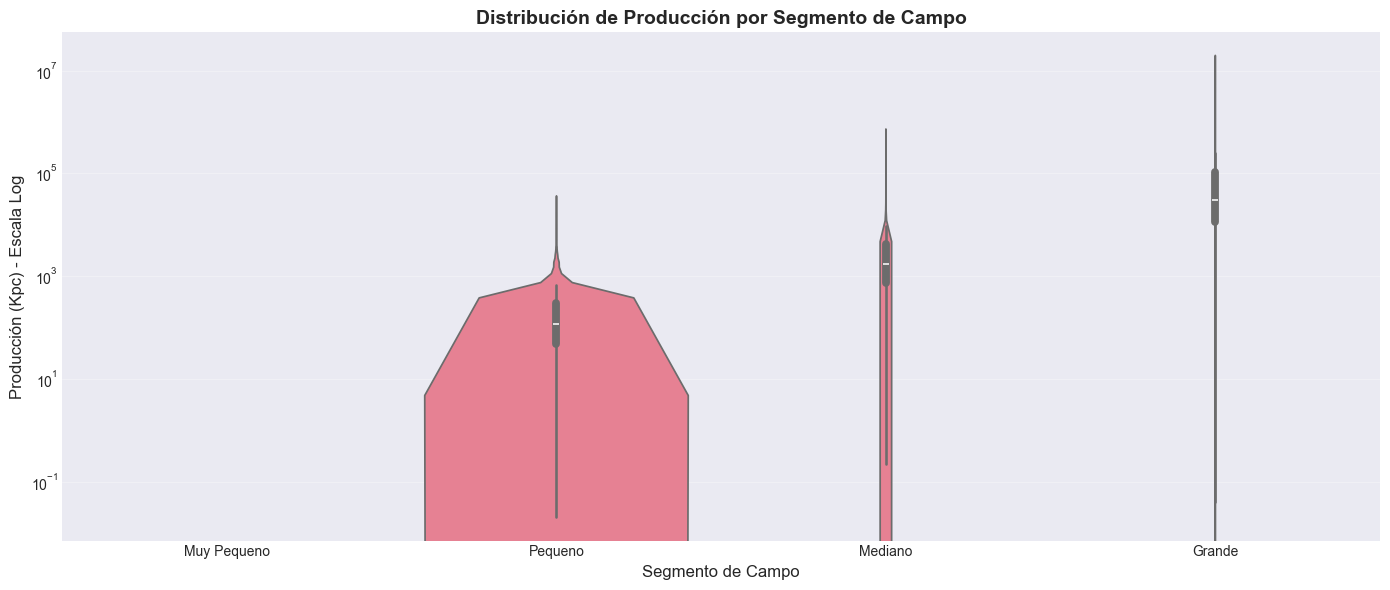

In [22]:
# Visualizacion: Violin plot de producción por segmento
df_con_segmento = df.merge(
    pd.DataFrame({'Campo': campos_clasificados.index, 'Segmento': campos_clasificados.values}),
    on='Campo', how='left'
)

df_activos_seg = df_con_segmento[df_con_segmento['ProduccionKpc'] > 0]

plt.figure(figsize=(14, 6))
sns.violinplot(data=df_activos_seg, x='Segmento', y='ProduccionKpc',
               order=['Muy Pequeno', 'Pequeno', 'Mediano', 'Grande'])
plt.yscale('log')
plt.xlabel('Segmento de Campo', fontsize=12)
plt.ylabel('Producción (Kpc) - Escala Log', fontsize=12)
plt.title('Distribución de Producción por Segmento de Campo', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 4.2 Análisis Univariado - Variables Categóricas

#### 4.2.1 Top Operadoras por Producción Total

In [23]:
# Top 10 operadoras por producción acumulada
print("\nTOP 10 OPERADORAS POR PRODUCCIÓN TOTAL (2014-2025)")
print("=" * 80)

top_operadoras = df.groupby('Operadora')['ProduccionKpc'].sum().sort_values(ascending=False).head(10)

for i, (operadora, producción) in enumerate(top_operadoras.items(), 1):
    pct = (producción / df['ProduccionKpc'].sum()) * 100
    print(f"{i:2d}. {operadora:50s} {producción:15,.0f} Kpc ({pct:5.2f}%)")

print(f"\nProduccion total nacional: {df['ProduccionKpc'].sum():,.0f} Kpc")


TOP 10 OPERADORAS POR PRODUCCIÓN TOTAL (2014-2025)
 1. ECOPETROL S.A.                                       3,428,511,745 Kpc (40.96%)
 2. EQUION ENERGÍA LIMITED                               1,735,035,641 Kpc (20.73%)
 3. ECOPETROL LLANOS                                     1,005,390,940 Kpc (12.01%)
 4. CHEVRON PETROLEUM COMPANY                              744,866,207 Kpc ( 8.90%)
 5. HOCOL S.A.                                             374,626,230 Kpc ( 4.48%)
 6. CNE OIL & GAS S A S                                    228,718,764 Kpc ( 2.73%)
 7. GEOPRODUCTION OIL AND GAS COMPANY OF COLOMBIA          133,141,303 Kpc ( 1.59%)
 8. CANACOL ENERGY COLOMBIA SAS                            125,186,045 Kpc ( 1.50%)
 9. LEWIS ENERGY COLOMBIA INC                               80,733,058 Kpc ( 0.96%)
10. PACIFIC STRATUS ENERGY COLOMBIA CORP                    78,835,106 Kpc ( 0.94%)

Produccion total nacional: 8,370,545,493 Kpc


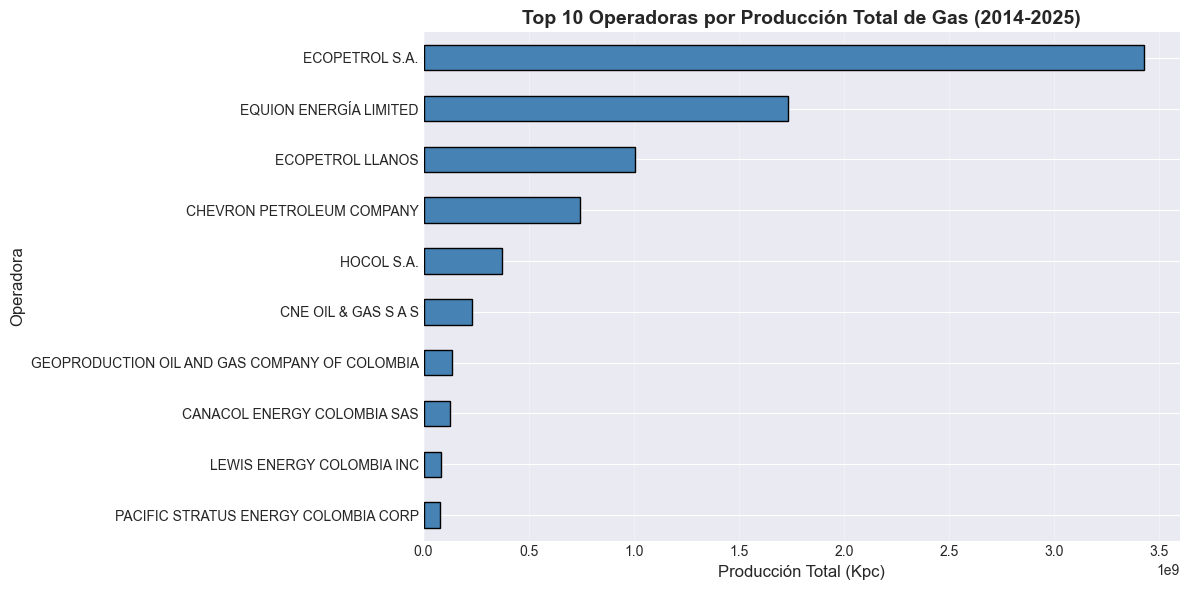

In [24]:
# Visualización: Gráfico de barras horizontales
plt.figure(figsize=(12, 6))
top_operadoras.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Producción Total (Kpc)', fontsize=12)
plt.ylabel('Operadora', fontsize=12)
plt.title('Top 10 Operadoras por Producción Total de Gas (2014-2025)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

#### 4.2.2 Distribucion por Departamento

In [25]:
# Top 10 departamentos por producción
print("\nTOP 10 DEPARTAMENTOS POR PRODUCCIÓN TOTAL")
print("=" * 80)

top_deptos = df.groupby('Departamento')['ProduccionKpc'].sum().sort_values(ascending=False).head(10)

for i, (depto, producción) in enumerate(top_deptos.items(), 1):
    pct = (producción / df['ProduccionKpc'].sum()) * 100
    print(f"{i:2d}. {depto:30s} {producción:15,.0f} Kpc ({pct:5.2f}%)")


TOP 10 DEPARTAMENTOS POR PRODUCCIÓN TOTAL
 1. CASANARE                         5,923,533,099 Kpc (70.77%)
 2. GUAJIRA                            974,267,583 Kpc (11.64%)
 3. SUCRE                              371,442,707 Kpc ( 4.44%)
 4. CORDOBA                            349,321,793 Kpc ( 4.17%)
 5. SANTANDER                          167,697,505 Kpc ( 2.00%)
 6. META                                76,122,004 Kpc ( 0.91%)
 7. ATLANTICO                           67,963,640 Kpc ( 0.81%)
 8. MAGDALENA                           67,084,681 Kpc ( 0.80%)
 9. HUILA                               66,554,091 Kpc ( 0.80%)
10. CESAR                               59,819,285 Kpc ( 0.71%)


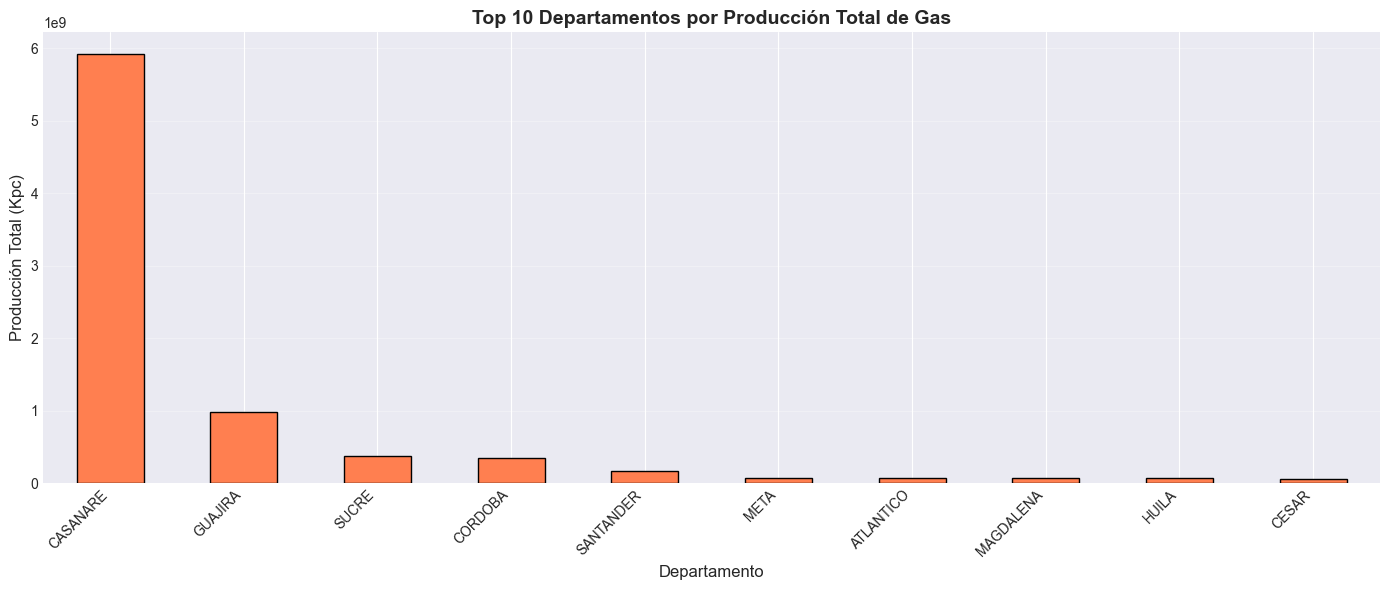

In [26]:
# Visualización: Gráfico de barras
plt.figure(figsize=(14, 6))
top_deptos.plot(kind='bar', color='coral', edgecolor='black')
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Producción Total (Kpc)', fontsize=12)
plt.title('Top 10 Departamentos por Producción Total de Gas', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

#### 4.2.3 Distribucion por Tipo de Contrato

In [27]:
# Producción por tipo de contrato
print("\nPRODUCCIÓN POR TIPO DE CONTRATO")
print("=" * 80)

prod_por_contrato = df.groupby('Tipo Contrato')['ProduccionKpc'].sum().sort_values(ascending=False)

for tipo, producción in prod_por_contrato.items():
    pct = (producción / df['ProduccionKpc'].sum()) * 100
    print(f"{tipo:50s} {producción:15,.0f} Kpc ({pct:5.2f}%)")


PRODUCCIÓN POR TIPO DE CONTRATO
CONTRATOS DE ASOCIACIÓN                              6,527,959,234 Kpc (77.99%)
E&P                                                    655,329,531 Kpc ( 7.83%)
CONVENIOS DE EXPLORACIÓN Y PRODUCCIÓN                  438,548,584 Kpc ( 5.24%)
CONVENIOS DE EXPLOTACIÓN                               409,650,394 Kpc ( 4.89%)
E&E                                                    335,701,980 Kpc ( 4.01%)
PROPIEDAD PRIVADA                                        2,265,154 Kpc ( 0.03%)
NO REGISTRA                                                989,497 Kpc ( 0.01%)
CRUDO PROPIO                                                61,251 Kpc ( 0.00%)
CDND/I                                                      21,007 Kpc ( 0.00%)
CONCESION                                                   18,860 Kpc ( 0.00%)
CONVENIOS DE EXPLORACIÓN Y EXPLOTACIÓN                           0 Kpc ( 0.00%)


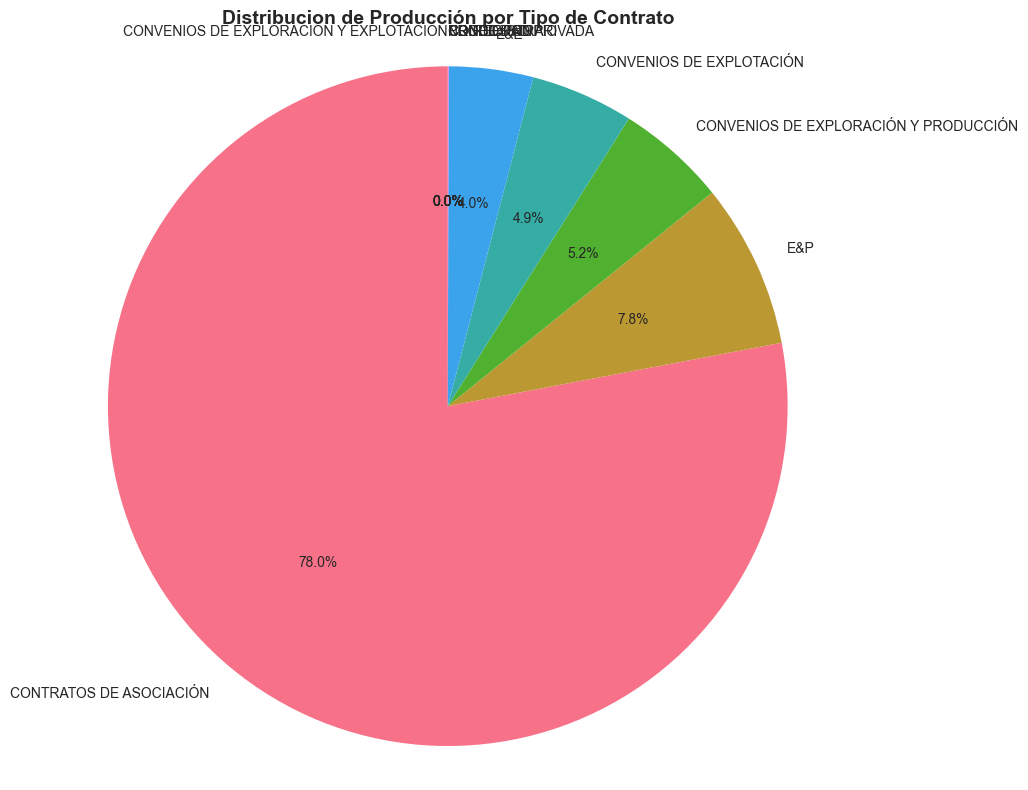

In [28]:
# Visualizacion: Gráfico de torta
plt.figure(figsize=(10, 8))
plt.pie(prod_por_contrato, labels=prod_por_contrato.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribucion de Producción por Tipo de Contrato', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.tight_layout()
plt.show()

### 4.3 Análisis Temporal

#### 4.3.1 Evolución Anual de la Producción

In [29]:
# Producción anual
print("\nPRODUCCIÓN ANUAL DE GAS (2014-2025)")
print("=" * 80)

prod_anual = df.groupby('Vigencia')['ProduccionKpc'].sum().sort_index()

for year, producción in prod_anual.items():
    print(f"  {year}: {producción:15,.0f} Kpc")

crecimiento = ((prod_anual.iloc[-1] / prod_anual.iloc[0]) - 1) * 100
print(f"\nCrecimiento total {prod_anual.index[0]}-{prod_anual.index[-1]}: {crecimiento:+.2f}%")
print(f"Tasa de crecimiento promedio anual: {(crecimiento / len(prod_anual)):+.2f}%")


PRODUCCIÓN ANUAL DE GAS (2014-2025)
  2014:     910,094,359 Kpc
  2015:     859,684,915 Kpc
  2016:     888,411,902 Kpc
  2017:     825,960,742 Kpc
  2018:     803,387,233 Kpc
  2019:     770,262,092 Kpc
  2020:     692,830,486 Kpc
  2021:     658,015,005 Kpc
  2022:     598,231,305 Kpc
  2023:     551,666,993 Kpc
  2024:     510,287,964 Kpc
  2025:     301,712,497 Kpc

Crecimiento total 2014-2025: -66.85%
Tasa de crecimiento promedio anual: -5.57%


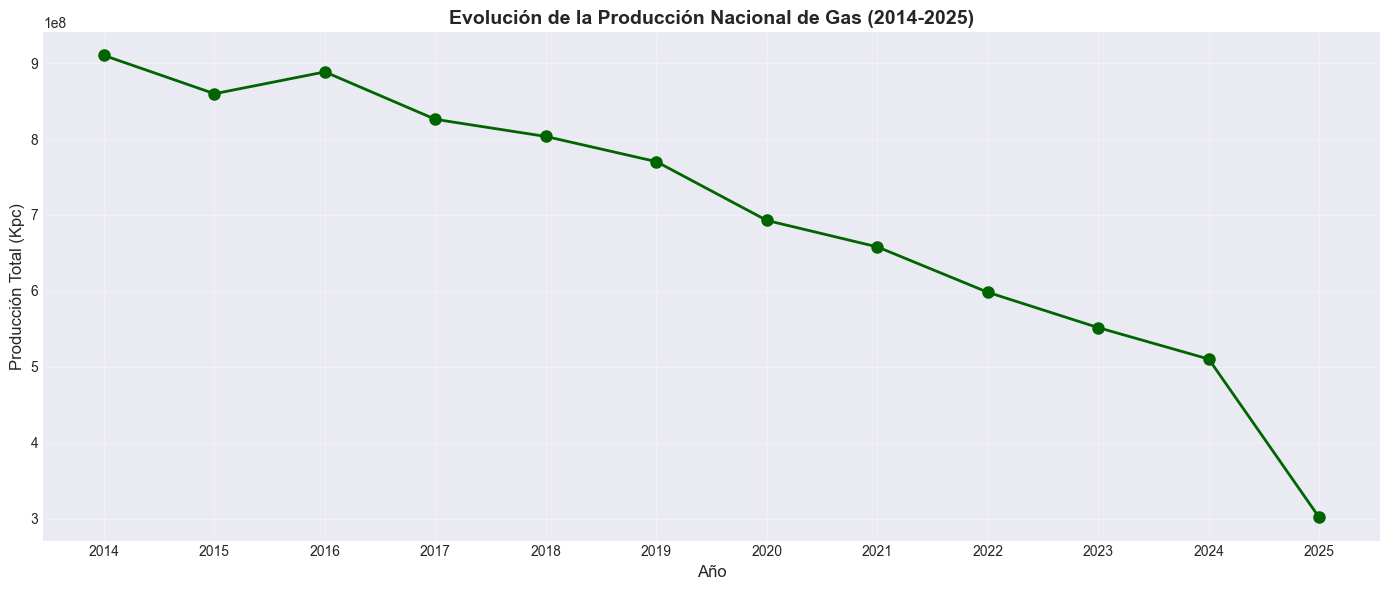

In [30]:
# Visualización: Serie temporal de producción anual
plt.figure(figsize=(14, 6))
plt.plot(prod_anual.index, prod_anual.values, marker='o', linewidth=2, markersize=8, color='darkgreen')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Total (Kpc)', fontsize=12)
plt.title('Evolución de la Producción Nacional de Gas (2014-2025)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(prod_anual.index)
plt.tight_layout()
plt.show()

#### 4.3.2 Análisis de Estacionalidad

In [31]:
# Producción promedio por mes (todos los años)
print("\nANÁLISIS DE ESTACIONALIDAD - PRODUCCIÓN PROMEDIO POR MES")
print("=" * 80)

prod_mensual = df.groupby('NombreMes')['ProduccionKpc'].mean().reindex([
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
])

for mes, prod_prom in prod_mensual.items():
    print(f"  {mes:12s}: {prod_prom:10,.2f} Kpc (promedio)")


ANÁLISIS DE ESTACIONALIDAD - PRODUCCIÓN PROMEDIO POR MES
  Enero       : 133,775.91 Kpc (promedio)
  Febrero     : 126,625.87 Kpc (promedio)
  Marzo       : 136,577.78 Kpc (promedio)
  Abril       : 128,120.73 Kpc (promedio)
  Mayo        : 129,139.49 Kpc (promedio)
  Junio       : 124,754.86 Kpc (promedio)
  Julio       : 127,216.67 Kpc (promedio)
  Agosto      : 127,720.35 Kpc (promedio)
  Septiembre  : 130,815.44 Kpc (promedio)
  Octubre     : 134,028.72 Kpc (promedio)
  Noviembre   : 129,620.46 Kpc (promedio)
  Diciembre   : 131,494.87 Kpc (promedio)


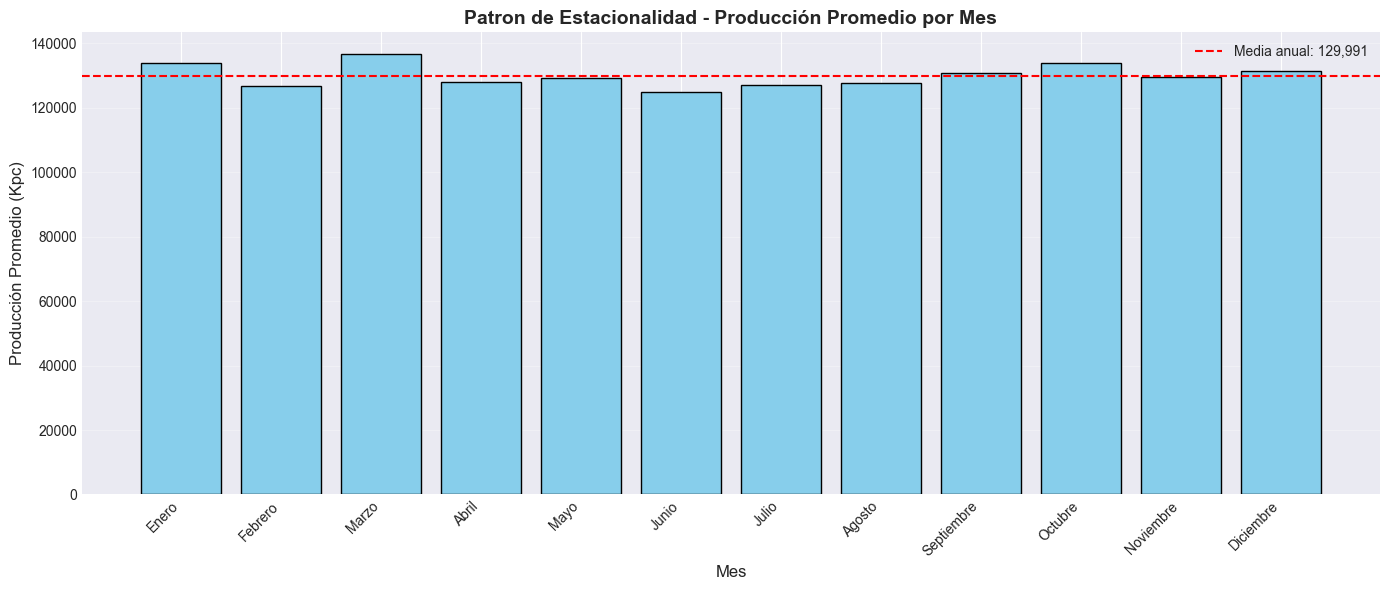

In [32]:
# Visualización: Producción promedio mensual
plt.figure(figsize=(14, 6))
plt.bar(range(1, 13), prod_mensual.values, color='skyblue', edgecolor='black')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Producción Promedio (Kpc)', fontsize=12)
plt.title('Patron de Estacionalidad - Producción Promedio por Mes', fontsize=14, fontweight='bold')
plt.xticks(range(1, 13), prod_mensual.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(prod_mensual.mean(), color='red', linestyle='--', label=f'Media anual: {prod_mensual.mean():,.0f}')
plt.legend()
plt.tight_layout()
plt.show()

#### 4.3.3 Heatmap Temporal (Año x Mes)


HEATMAP TEMPORAL - PRODUCCIÓN POR AÑO Y MES


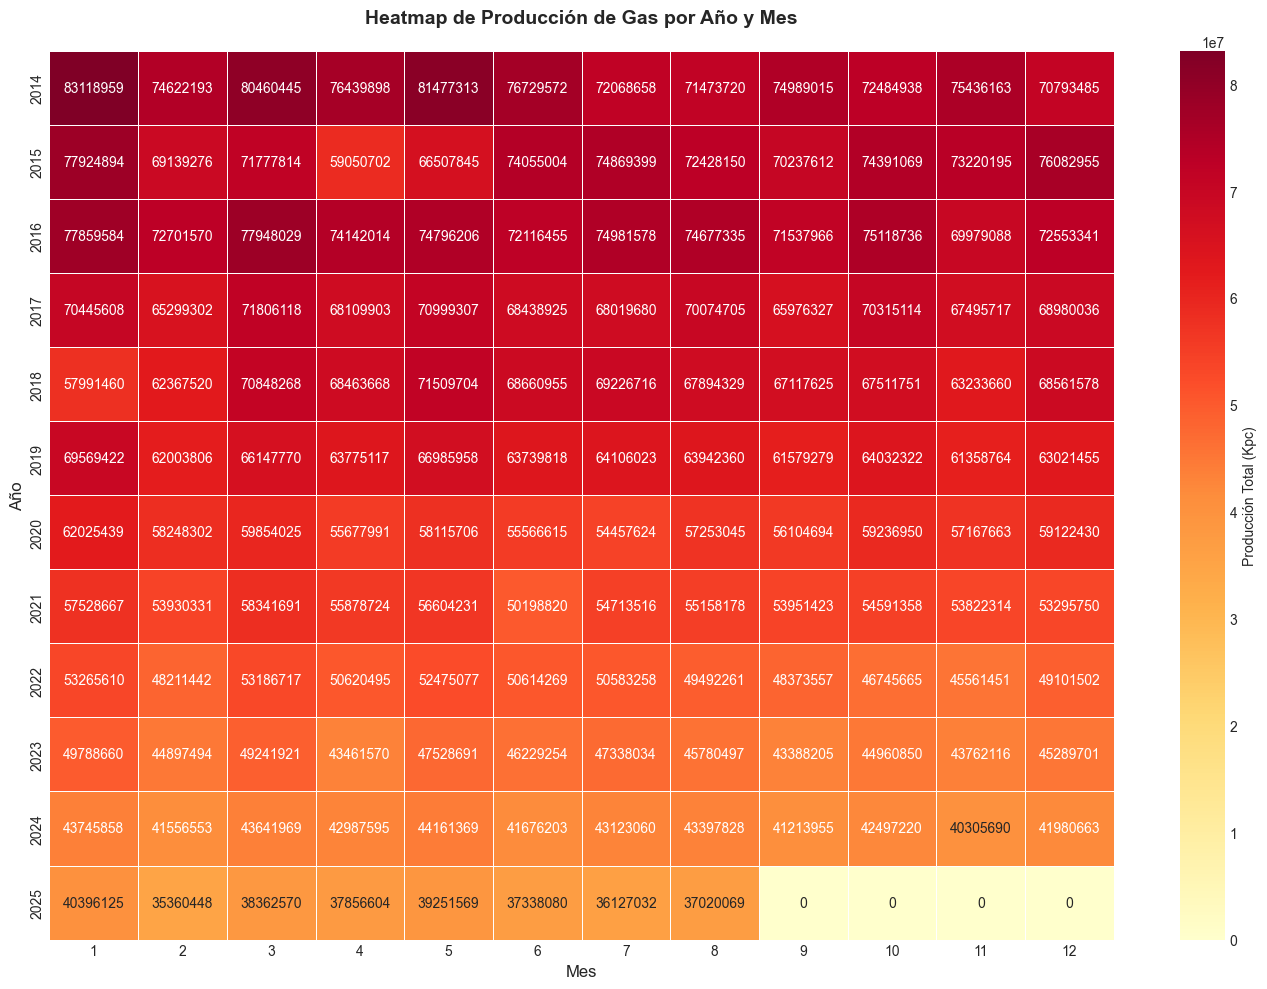

In [33]:
# Heatmap de producción por año y mes
print("\nHEATMAP TEMPORAL - PRODUCCIÓN POR AÑO Y MES")
print("=" * 80)

heatmap_data = df.pivot_table(
    values='ProduccionKpc',
    index='Vigencia',
    columns='Mes',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=0.5,
            cbar_kws={'label': 'Producción Total (Kpc)'})
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Año', fontsize=12)
plt.title('Heatmap de Producción de Gas por Año y Mes', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

#### 4.3.4 Análisis de Tasa de Crecimiento


TASA DE CRECIMIENTO ANUAL (Year-over-Year)

Tasa de crecimiento Año a Año:
  2015: -5.54%
  2016: +3.34%
  2017: -7.03%
  2018: -2.73%
  2019: -4.12%
  2020: -10.05%
  2021: -5.03%
  2022: -9.09%
  2023: -7.78%
  2024: -7.50%
  2025: -40.87%


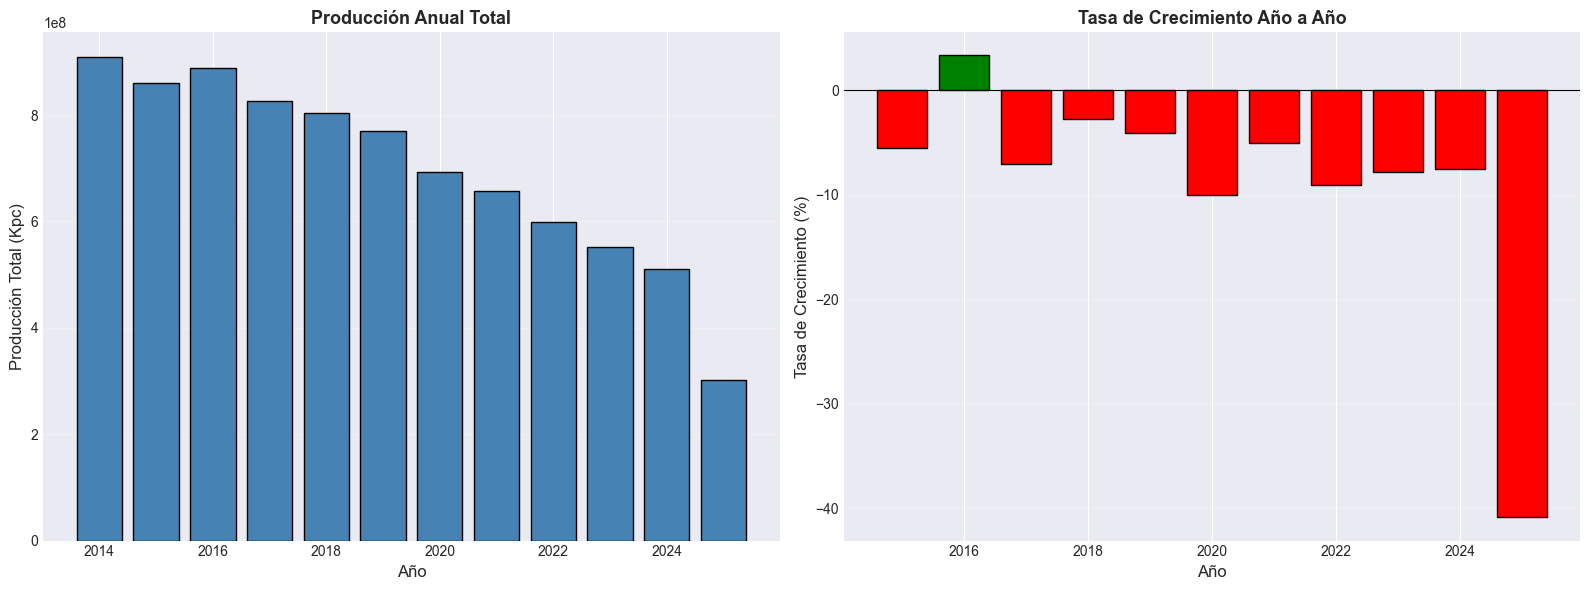

In [34]:
# Calcular tasa de crecimiento Año a Año
print("\nTASA DE CRECIMIENTO ANUAL (Year-over-Year)")
print("=" * 80)

prod_anual_growth = df.groupby('Vigencia')['ProduccionKpc'].sum().sort_index()
tasa_crecimiento = prod_anual_growth.pct_change() * 100

print("\nTasa de crecimiento Año a Año:")
for year, tasa in tasa_crecimiento.items():
    if pd.notna(tasa):
        print(f"  {year}: {tasa:+.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(prod_anual_growth.index, prod_anual_growth.values, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Año', fontsize=12)
axes[0].set_ylabel('Producción Total (Kpc)', fontsize=12)
axes[0].set_title('Producción Anual Total', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

colors = ['green' if x > 0 else 'red' for x in tasa_crecimiento.dropna()]
axes[1].bar(tasa_crecimiento.dropna().index, tasa_crecimiento.dropna().values,
            color=colors, edgecolor='black')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].set_xlabel('Año', fontsize=12)
axes[1].set_ylabel('Tasa de Crecimiento (%)', fontsize=12)
axes[1].set_title('Tasa de Crecimiento Año a Año', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

#### 4.3.5 Composicion Temporal por Operadora (Area Apilada)


COMPOSICIÓN TEMPORAL DE PRODUCCIÓN


<Figure size 1600x800 with 0 Axes>

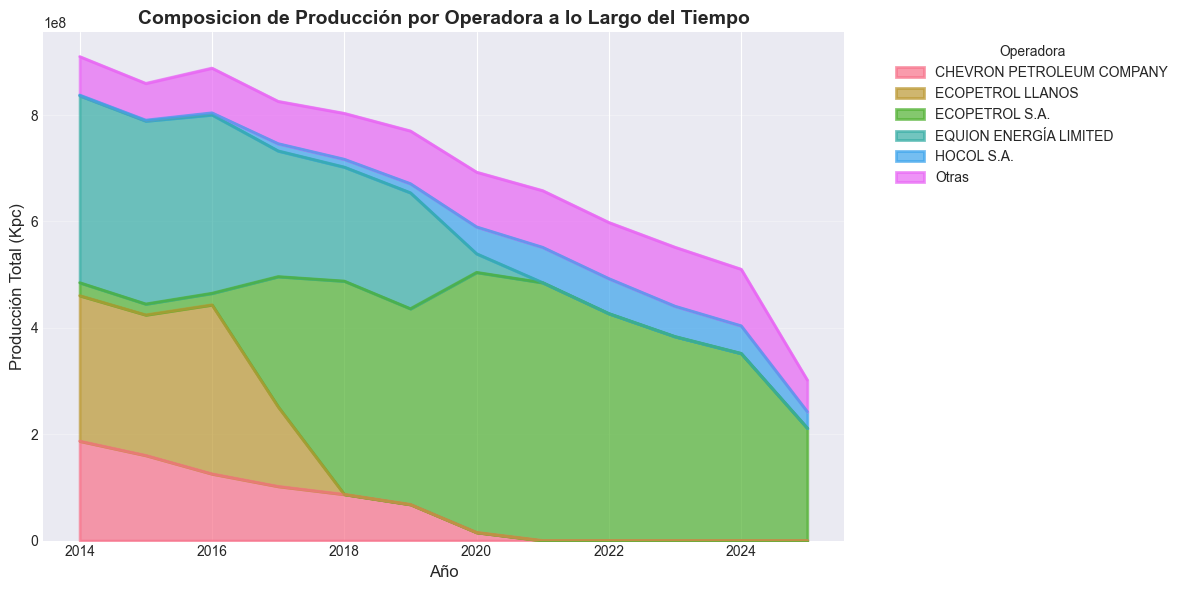

In [35]:
# Gráfico de área apilada - Composición de producción por top operadoras
print("\nCOMPOSICIÓN TEMPORAL DE PRODUCCIÓN")
print("=" * 80)

top5_ops = df.groupby('Operadora')['ProduccionKpc'].sum().nlargest(5).index
df_comp = df.copy()
df_comp['Operadora_Agrupada'] = df_comp['Operadora'].apply(
    lambda x: x if x in top5_ops else 'Otras'
)

comp_temporal = df_comp.groupby(['Vigencia', 'Operadora_Agrupada'])['ProduccionKpc'].sum().unstack(fill_value=0)

if 'Otras' in comp_temporal.columns:
    cols_ordenadas = [col for col in comp_temporal.columns if col != 'Otras'] + ['Otras']
    comp_temporal = comp_temporal[cols_ordenadas]

plt.figure(figsize=(16, 8))
comp_temporal.plot.area(stacked=True, alpha=0.7, linewidth=2)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción Total (Kpc)', fontsize=12)
plt.title('Composicion de Producción por Operadora a lo Largo del Tiempo', fontsize=14, fontweight='bold')
plt.legend(title='Operadora', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

### 4.4 Análisis Bivariado

#### 4.4.1 Producción por Operadora a lo Largo del Tiempo

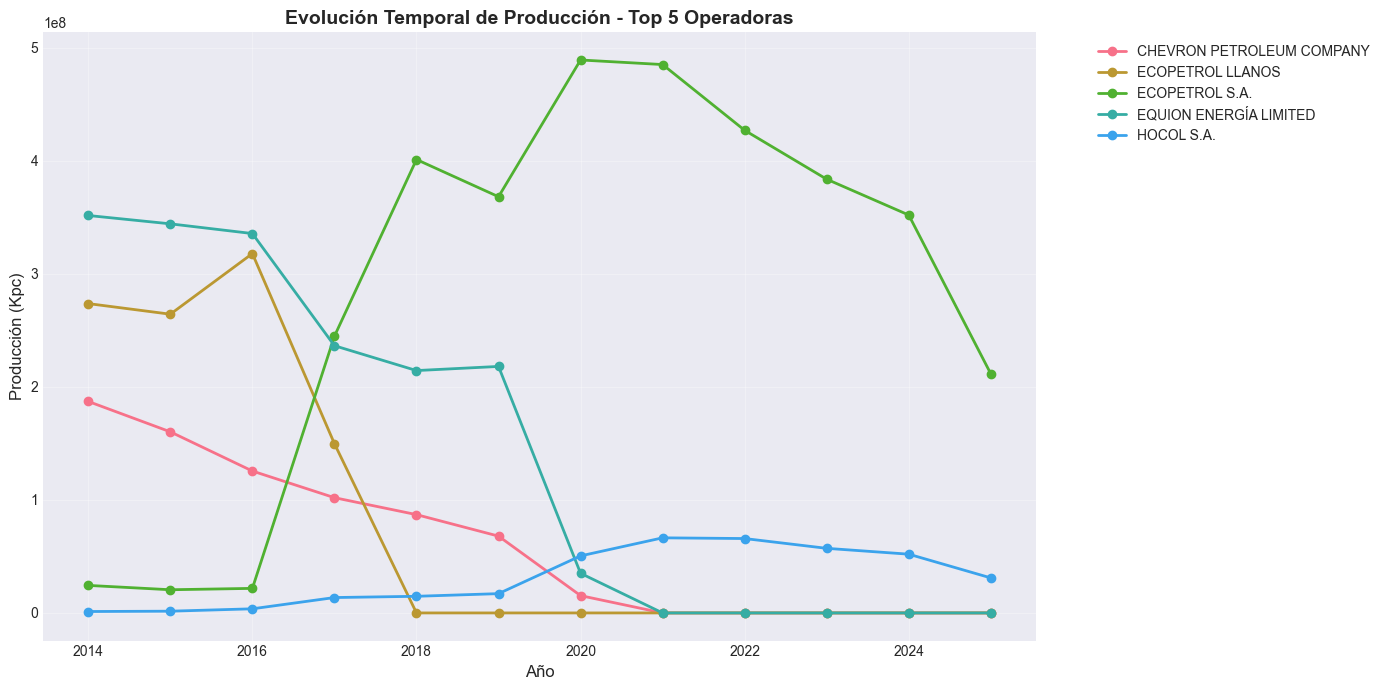

In [36]:
# Serie temporal de top 5 operadoras
top5_operadoras = df.groupby('Operadora')['ProduccionKpc'].sum().nlargest(5).index

df_top5 = df[df['Operadora'].isin(top5_operadoras)]
prod_op_year = df_top5.groupby(['Vigencia', 'Operadora'])['ProduccionKpc'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
for operadora in prod_op_year.columns:
    plt.plot(prod_op_year.index, prod_op_year[operadora], marker='o', linewidth=2, label=operadora)

plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción (Kpc)', fontsize=12)
plt.title('Evolución Temporal de Producción - Top 5 Operadoras', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 4.4.2 Comparación Departamental (Top 5)

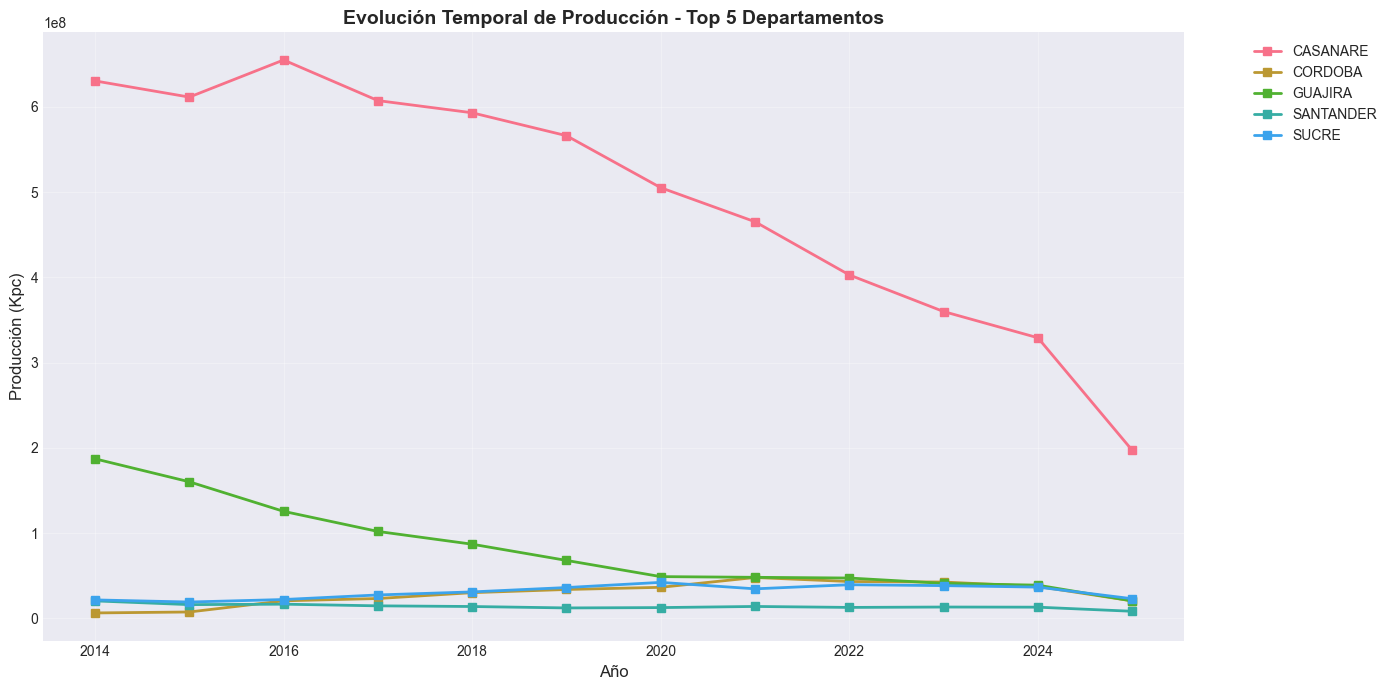

In [37]:
# Producción promedio anual por departamento (top 5)
top5_deptos = df.groupby('Departamento')['ProduccionKpc'].sum().nlargest(5).index

df_top5_dep = df[df['Departamento'].isin(top5_deptos)]
prod_dep_year = df_top5_dep.groupby(['Vigencia', 'Departamento'])['ProduccionKpc'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 7))
for depto in prod_dep_year.columns:
    plt.plot(prod_dep_year.index, prod_dep_year[depto], marker='s', linewidth=2, label=depto)

plt.xlabel('Año', fontsize=12)
plt.ylabel('Producción (Kpc)', fontsize=12)
plt.title('Evolución Temporal de Producción - Top 5 Departamentos', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 4.4.3 Análisis de Concentración de Mercado


ANÁLISIS DE CONCENTRACIÓN - PRINCIPIO DE PARETO

Principio de Pareto (80/20):
  - 3 operadoras (3.4% del total) generan el 80% de la producción
  - Top 3 operadoras: 73.7% de la producción
  - Top 5 operadoras: 87.1% de la producción
  - Top 10 operadoras: 94.8% de la producción


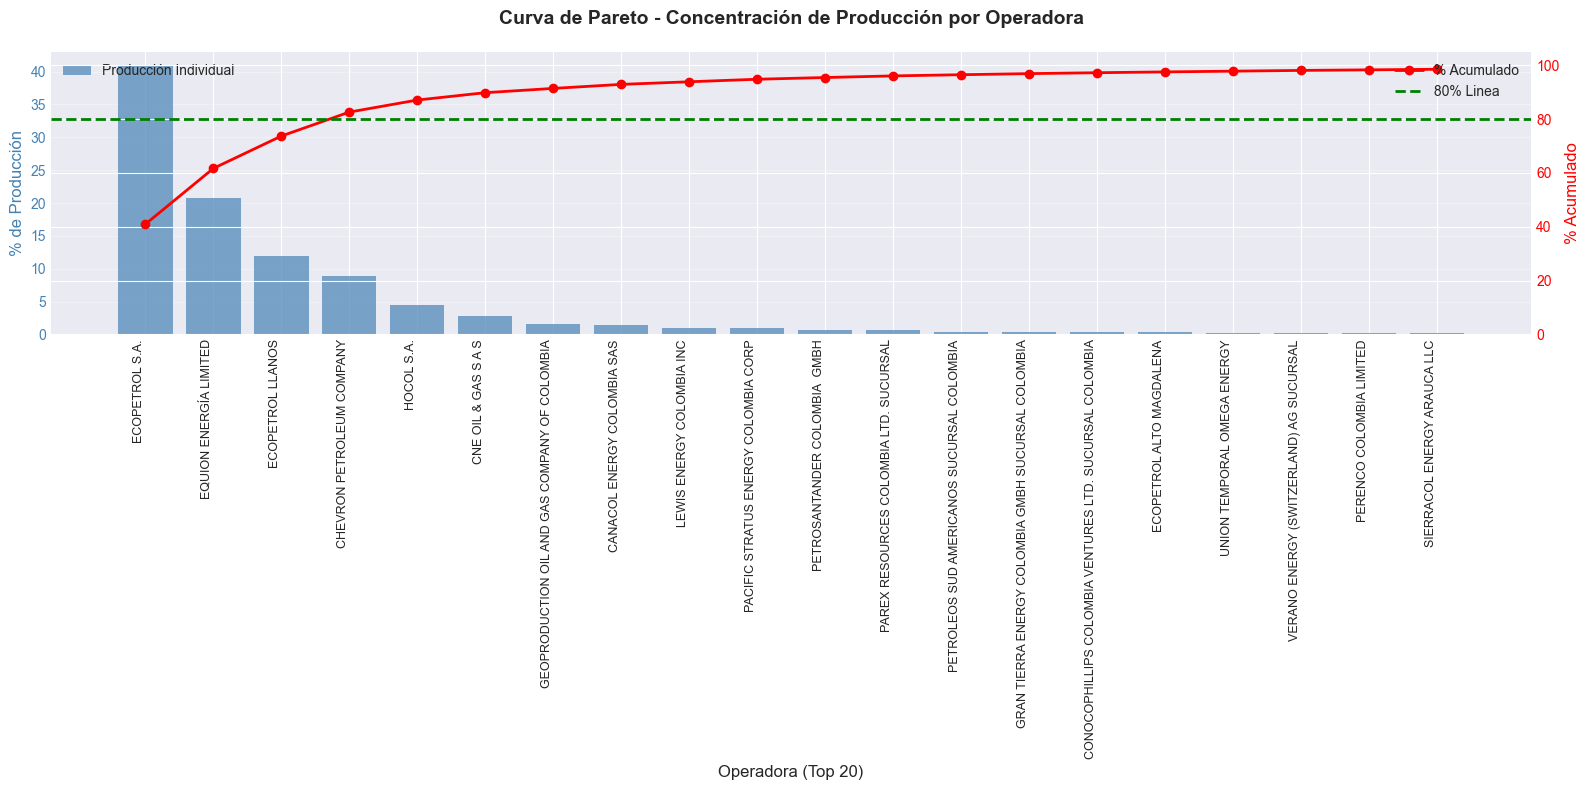

In [38]:
# Análisis de concentración - Curva de Pareto
print("\nANÁLISIS DE CONCENTRACIÓN - PRINCIPIO DE PARETO")
print("=" * 80)

prod_operadora = df.groupby('Operadora')['ProduccionKpc'].sum().sort_values(ascending=False)
prod_operadora_pct = (prod_operadora / prod_operadora.sum()) * 100
prod_operadora_cum = prod_operadora_pct.cumsum()

idx_80 = (prod_operadora_cum <= 80).sum()
pct_operadoras_80 = (idx_80 / len(prod_operadora)) * 100

print(f"\nPrincipio de Pareto (80/20):")
print(f"  - {idx_80} operadoras ({pct_operadoras_80:.1f}% del total) generan el 80% de la producción")
print(f"  - Top 3 operadoras: {prod_operadora_cum.iloc[2]:.1f}% de la producción")
print(f"  - Top 5 operadoras: {prod_operadora_cum.iloc[4]:.1f}% de la producción")
print(f"  - Top 10 operadoras: {prod_operadora_cum.iloc[9]:.1f}% de la producción")

fig, ax1 = plt.subplots(figsize=(16, 8))

ax1.bar(range(len(prod_operadora.head(20))), prod_operadora_pct.head(20),
        color='steelblue', alpha=0.7, label='Producción Individual')
ax1.set_xlabel('Operadora (Top 20)', fontsize=12)
ax1.set_ylabel('% de Producción', fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(range(len(prod_operadora.head(20))))
ax1.set_xticklabels(prod_operadora.head(20).index, rotation=90, ha='right', fontsize=9)

ax2 = ax1.twinx()
ax2.plot(range(len(prod_operadora_cum.head(20))), prod_operadora_cum.head(20),
         color='red', marker='o', linewidth=2, markersize=6, label='% Acumulado')
ax2.axhline(y=80, color='green', linestyle='--', linewidth=2, label='80% Linea')
ax2.set_ylabel('% Acumulado', fontsize=12, color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim([0, 105])

plt.title('Curva de Pareto - Concentración de Producción por Operadora', fontsize=14, fontweight='bold', pad=20)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [39]:
# Índice de Herfindahl-Hirschman (HHI)
print("\nÍNDICE DE CONCENTRACIÓN - HERFINDAHL-HIRSCHMAN (HHI)")
print("=" * 80)

market_shares = (prod_operadora / prod_operadora.sum()) * 100
hhi = (market_shares ** 2).sum()

print(f"\nHHI = {hhi:.0f}")
print("\nInterpretacion del HHI:")
print("  - HHI < 1,500: Mercado no concentrado (competitivo)")
print("  - HHI 1,500 - 2,500: Mercado moderadamente concentrado")
print("  - HHI > 2,500: Mercado altamente concentrado")

if hhi < 1500:
    interpretacion = "NO CONCENTRADO - Mercado competitivo"
elif hhi < 2500:
    interpretacion = "MODERADAMENTE CONCENTRADO"
else:
    interpretacion = "ALTAMENTE CONCENTRADO - Riesgo de concentración"

print(f"\n-> Este mercado está: {interpretacion}")

print("\nCuota de mercado (Top 10):")
for i, (op, share) in enumerate(market_shares.head(10).items(), 1):
    print(f"  {i:2d}. {op:50s} {share:6.2f}%")


ÍNDICE DE CONCENTRACIÓN - HERFINDAHL-HIRSCHMAN (HHI)

HHI = 2367

Interpretacion del HHI:
  - HHI < 1,500: Mercado no concentrado (competitivo)
  - HHI 1,500 - 2,500: Mercado moderadamente concentrado
  - HHI > 2,500: Mercado altamente concentrado

-> Este mercado está: MODERADAMENTE CONCENTRADO

Cuota de mercado (Top 10):
   1. ECOPETROL S.A.                                      40.96%
   2. EQUION ENERGÍA LIMITED                              20.73%
   3. ECOPETROL LLANOS                                    12.01%
   4. CHEVRON PETROLEUM COMPANY                            8.90%
   5. HOCOL S.A.                                           4.48%
   6. CNE OIL & GAS S A S                                  2.73%
   7. GEOPRODUCTION OIL AND GAS COMPANY OF COLOMBIA        1.59%
   8. CANACOL ENERGY COLOMBIA SAS                          1.50%
   9. LEWIS ENERGY COLOMBIA INC                            0.96%
  10. PACIFIC STRATUS ENERGY COLOMBIA CORP                 0.94%


#### 4.4.4 Evolución de Participación de Mercado (Market Share)


EVOLUCIÓN DE PARTICIPACIÓN DE MERCADO


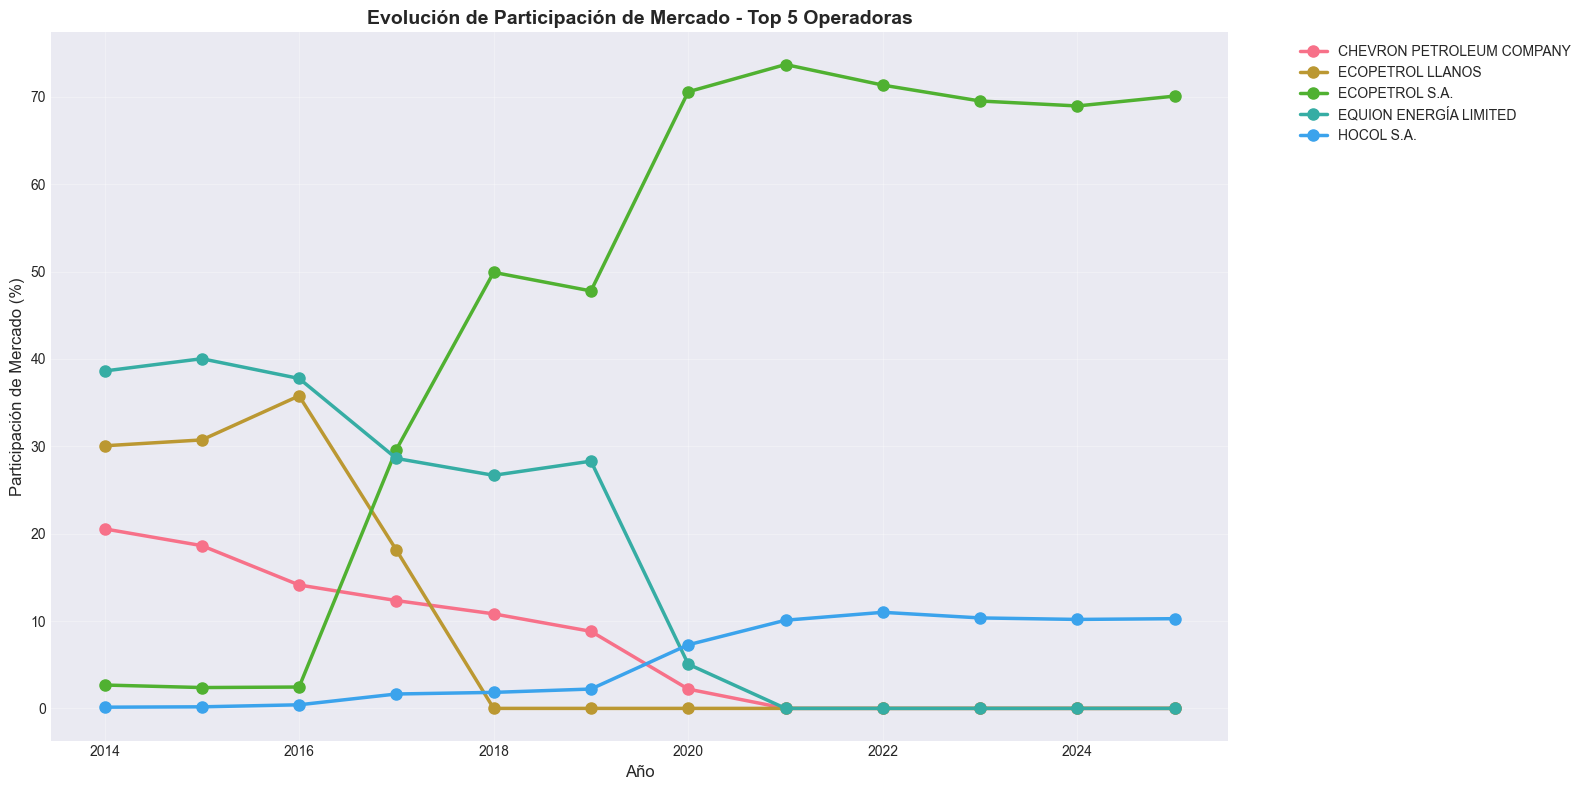

In [40]:
# Evolución del market share de top operadoras
print("\nEVOLUCIÓN DE PARTICIPACIÓN DE MERCADO")
print("=" * 80)

top5_global = df.groupby('Operadora')['ProduccionKpc'].sum().nlargest(5).index

market_share_anual = []
for year in sorted(df['Vigencia'].unique()):
    df_year = df[df['Vigencia'] == year]
    total_year = df_year['ProduccionKpc'].sum()

    for op in top5_global:
        prod_op = df_year[df_year['Operadora'] == op]['ProduccionKpc'].sum()
        share = (prod_op / total_year) * 100 if total_year > 0 else 0
        market_share_anual.append({
            'Año': year,
            'Operadora': op,
            'Market_Share': share
        })

df_ms = pd.DataFrame(market_share_anual)
df_ms_pivot = df_ms.pivot(index='Año', columns='Operadora', values='Market_Share')

plt.figure(figsize=(16, 8))
for operadora in df_ms_pivot.columns:
    plt.plot(df_ms_pivot.index, df_ms_pivot[operadora], marker='o', linewidth=2.5,
             markersize=8, label=operadora)

plt.xlabel('Año', fontsize=12)
plt.ylabel('Participación de Mercado (%)', fontsize=12)
plt.title('Evolución de Participación de Mercado - Top 5 Operadoras', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### 4.4.5 Análisis Geoespacial de Producción


ANÁLISIS GEOESPACIAL DE PRODUCCIÓN
Total de ubicaciones únicas con coordenadas válidas: 513
Producción total geolocalizada: 7,360,951,340 Kpc
Porcentaje de producción geolocalizada: 87.9%


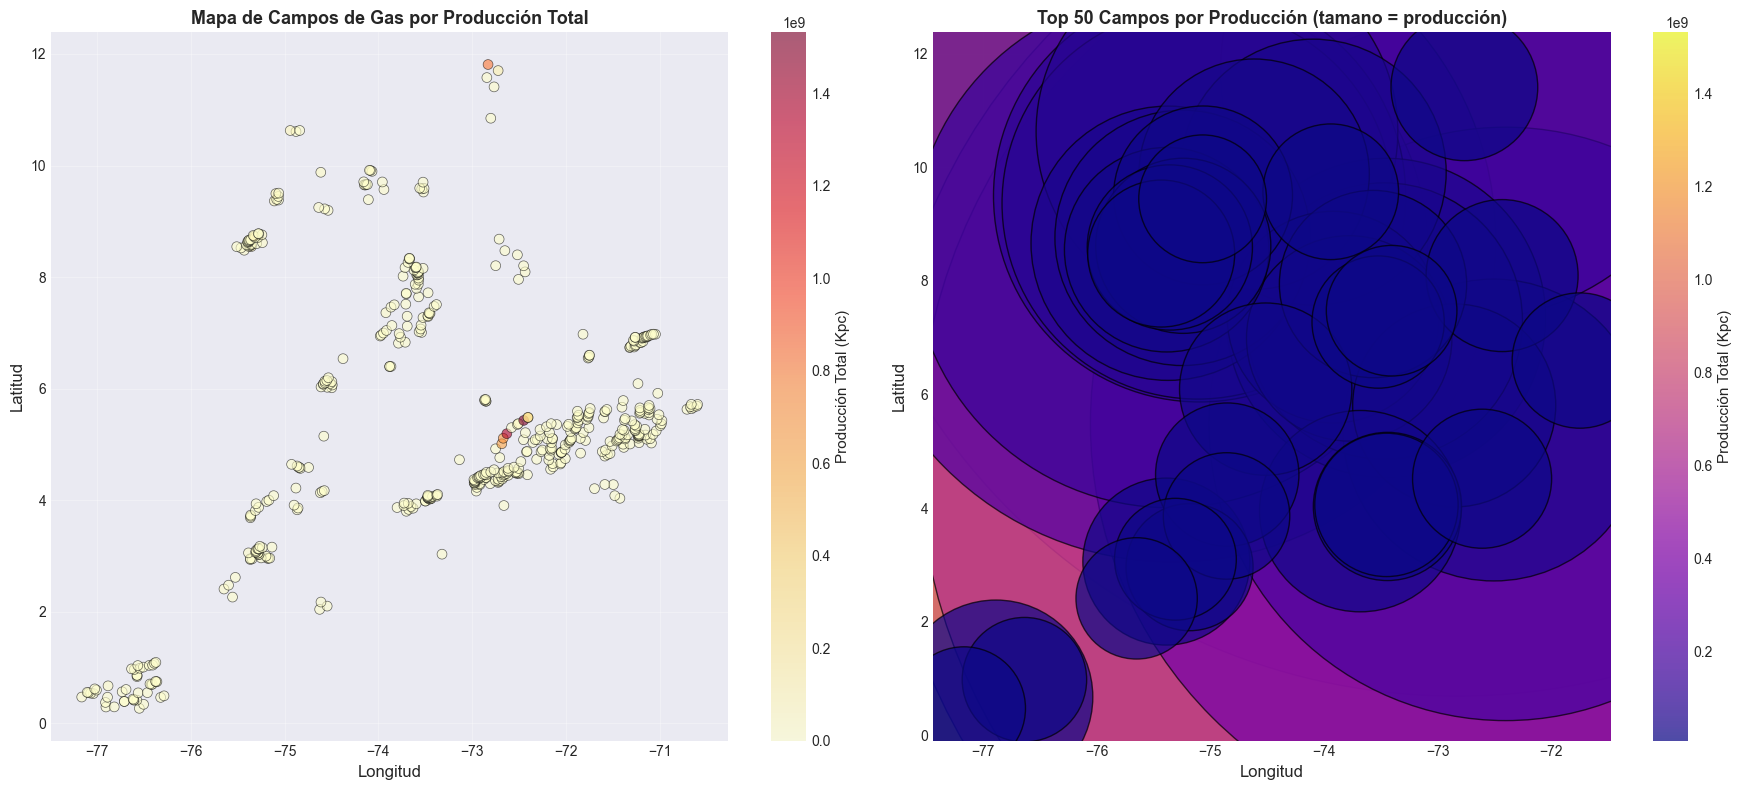

In [41]:
# Análisis geoespacial - Mapa de producción
print("\nANÁLISIS GEOESPACIAL DE PRODUCCIÓN")
print("=" * 80)

df_geo = df[df['CoordenadasValidas']].copy()

df_geo_agg = df_geo.groupby(['Latitud', 'Longitud', 'Campo']).agg({
    'ProduccionKpc': 'sum',
    'Departamento': 'first',
    'Operadora': 'first'
}).reset_index()

print(f"Total de ubicaciones únicas con coordenadas válidas: {len(df_geo_agg):,}")
print(f"Producción total geolocalizada: {df_geo_agg['ProduccionKpc'].sum():,.0f} Kpc")
print(f"Porcentaje de producción geolocalizada: {(df_geo_agg['ProduccionKpc'].sum() / df['ProduccionKpc'].sum()) * 100:.1f}%")

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

scatter1 = axes[0].scatter(df_geo_agg['Longitud'], df_geo_agg['Latitud'],
                           c=df_geo_agg['ProduccionKpc'], s=50,
                           cmap='YlOrRd', alpha=0.6, edgecolors='black', linewidth=0.5)
axes[0].set_xlabel('Longitud', fontsize=12)
axes[0].set_ylabel('Latitud', fontsize=12)
axes[0].set_title('Mapa de Campos de Gas por Producción Total', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes[0])
cbar1.set_label('Producción Total (Kpc)', fontsize=11)

top_campos_geo = df_geo_agg.nlargest(50, 'ProduccionKpc')
scatter2 = axes[1].scatter(top_campos_geo['Longitud'], top_campos_geo['Latitud'],
                           s=top_campos_geo['ProduccionKpc']/1000,
                           c=top_campos_geo['ProduccionKpc'],
                           cmap='plasma', alpha=0.7, edgecolors='black', linewidth=1)
axes[1].set_xlabel('Longitud', fontsize=12)
axes[1].set_ylabel('Latitud', fontsize=12)
axes[1].set_title('Top 50 Campos por Producción (tamano = producción)', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3)
cbar2 = plt.colorbar(scatter2, ax=axes[1])
cbar2.set_label('Producción Total (Kpc)', fontsize=11)

plt.tight_layout()
plt.show()


DENSIDAD DE PRODUCCIÓN POR REGION GEOGRÁFICA

Producción por región geográfica:
                Produccion_Total  Num_Campos  Produccion_Promedio
Region                                                           
Otra               5070766800.54         277          18306017.33
Caribe/Norte       1201905746.61          66          18210693.13
Pacifico            720675627.92          33          21838655.39
Andina Central      205747399.89          40           5143685.00
Amazonia            134892103.04          84           1605858.37
Orinoquia            26963661.90          13           2074127.84


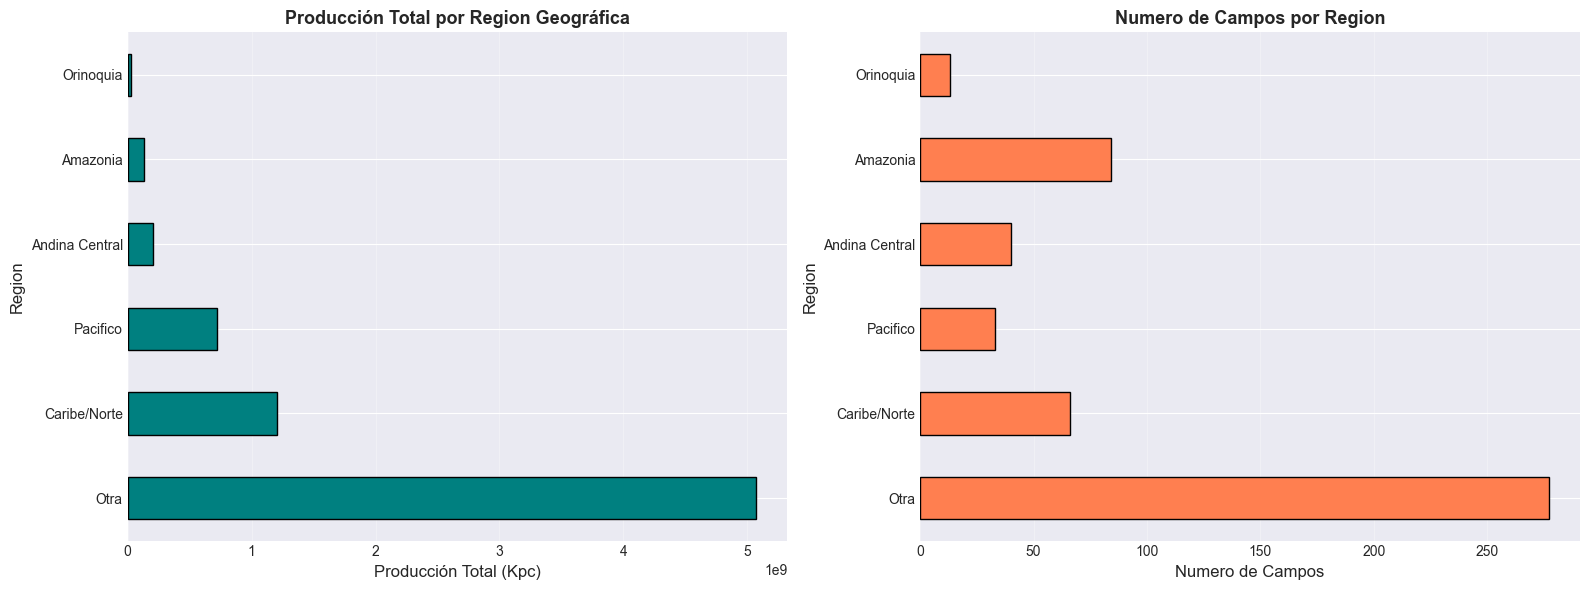

In [42]:
# Análisis de densidad geográfica por región
print("\nDENSIDAD DE PRODUCCIÓN POR REGION GEOGRÁFICA")
print("=" * 80)

def clasificar_region(lat, lon):
    if lat > 7 and lon > -74:
        return 'Caribe/Norte'
    elif lat > 4 and lon < -75:
        return 'Pacifico'
    elif lat > 4 and -75 <= lon <= -74:
        return 'Andina Central'
    elif lat <= 4 and lon > -74:
        return 'Orinoquia'
    elif lat <= 4 and lon <= -74:
        return 'Amazonia'
    else:
        return 'Otra'

df_geo_agg['Region'] = df_geo_agg.apply(lambda x: clasificar_region(x['Latitud'], x['Longitud']), axis=1)

prod_por_region = df_geo_agg.groupby('Region').agg({
    'ProduccionKpc': 'sum',
    'Campo': 'count'
}).sort_values('ProduccionKpc', ascending=False)
prod_por_region.columns = ['Produccion_Total', 'Num_Campos']
prod_por_region['Produccion_Promedio'] = prod_por_region['Produccion_Total'] / prod_por_region['Num_Campos']

print("\nProducción por región geográfica:")
print(prod_por_region)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

prod_por_region['Produccion_Total'].plot(kind='barh', ax=axes[0], color='teal', edgecolor='black')
axes[0].set_xlabel('Producción Total (Kpc)', fontsize=12)
axes[0].set_ylabel('Region', fontsize=12)
axes[0].set_title('Producción Total por Region Geográfica', fontsize=13, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

prod_por_region['Num_Campos'].plot(kind='barh', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_xlabel('Numero de Campos', fontsize=12)
axes[1].set_ylabel('Region', fontsize=12)
axes[1].set_title('Numero de Campos por Region', fontsize=13, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### 4.5 Análisis de Outliers y Valores Extremos

In [43]:
# Identificar campos con producción extremadamente alta
print("\nCAMPOS CON MAYOR PRODUCCIÓN TOTAL (2014-2025)")
print("=" * 80)

top_campos = df.groupby(['Campo', 'Operadora', 'Departamento'])['ProduccionKpc'].sum().nlargest(10)

for i, ((campo, operadora, depto), producción) in enumerate(top_campos.items(), 1):
    pct = (producción / df['ProduccionKpc'].sum()) * 100
    print(f"{i:2d}. Campo: {campo:30s} | Operadora: {operadora:40s}")
    print(f"    Depto: {depto:20s} | Producción: {producción:12,.0f} Kpc ({pct:5.2f}%)")
    print()


CAMPOS CON MAYOR PRODUCCIÓN TOTAL (2014-2025)
 1. Campo: PAUTO SUR                      | Operadora: EQUION ENERGÍA LIMITED                  
    Depto: CASANARE             | Producción:  805,847,134 Kpc ( 9.63%)

 2. Campo: CUPIAGUA                       | Operadora: ECOPETROL S.A.                          
    Depto: CASANARE             | Producción:  763,793,916 Kpc ( 9.12%)

 3. Campo: PAUTO SUR                      | Operadora: ECOPETROL S.A.                          
    Depto: CASANARE             | Producción:  726,128,379 Kpc ( 8.67%)

 4. Campo: CHUCHUPA                       | Operadora: CHEVRON PETROLEUM COMPANY               
    Depto: GUAJIRA              | Producción:  643,102,057 Kpc ( 7.68%)

 5. Campo: CUPIAGUA                       | Operadora: ECOPETROL LLANOS                        
    Depto: CASANARE             | Producción:  619,344,797 Kpc ( 7.40%)

 6. Campo: CUPIAGUA SUR                   | Operadora: ECOPETROL S.A.                          
    Depto: C

In [44]:
# Detección estadística de outliers (método IQR)
Q1 = produccion_activa.quantile(0.25)
Q3 = produccion_activa.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = produccion_activa[(produccion_activa < limite_inferior) | (produccion_activa > limite_superior)]

print(f"\nDETECCION DE OUTLIERS (Metodo IQR)")
print("=" * 80)
print(f"Q1 (25%): {Q1:,.2f}")
print(f"Q3 (75%): {Q3:,.2f}")
print(f"IQR: {IQR:,.2f}")
print(f"\nLimite inferior: {limite_inferior:,.2f}")
print(f"Limite superior: {limite_superior:,.2f}")
print(f"\nNumero de outliers detectados: {len(outliers):,} ({len(outliers)/len(produccion_activa)*100:.2f}% del total)")
print(f"Valor maximo (outlier extremo): {outliers.max():,.2f} Kpc")


DETECCION DE OUTLIERS (Metodo IQR)
Q1 (25%): 1,039.18
Q3 (75%): 31,839.74
IQR: 30,800.56

Limite inferior: -45,161.65
Limite superior: 78,040.58

Numero de outliers detectados: 5,539 (15.23% del total)
Valor maximo (outlier extremo): 19,240,969.00 Kpc


### 4.6 Análisis de Completitud y Calidad de Datos

In [45]:
# Análisis de completitud de datos
print("\nANALISIS DE COMPLETITUD Y CALIDAD DE DATOS")
print("=" * 80)

prod_cero = (df['ProduccionKpc'] == 0).sum()
prod_cero_pct = (prod_cero / len(df)) * 100

print(f"\n1. REGISTROS CON PRODUCCION = 0")
print(f"   - Total: {prod_cero:,} registros ({prod_cero_pct:.1f}%)")
print(f"   - Esto puede ser normal: campos inactivos temporalmente")

coords_invalidas = (~df['CoordenadasValidas']).sum()
coords_invalidas_pct = (coords_invalidas / len(df)) * 100

print(f"\n2. COORDENADAS INVALIDAS (0, 0)")
print(f"   - Total: {coords_invalidas:,} registros ({coords_invalidas_pct:.1f}%)")

coords_por_anio = df.groupby('Vigencia')['CoordenadasValidas'].apply(lambda x: (~x).sum())
print(f"\n   Coordenadas invalidas por año:")
for year, count in coords_por_anio.items():
    total_year = len(df[df['Vigencia'] == year])
    pct = (count / total_year) * 100
    print(f"   - {year}: {count:,} ({pct:.1f}%)")


ANALISIS DE COMPLETITUD Y CALIDAD DE DATOS

1. REGISTROS CON PRODUCCION = 0
   - Total: 28,058 registros (43.6%)
   - Esto puede ser normal: campos inactivos temporalmente

2. COORDENADAS INVALIDAS (0, 0)
   - Total: 6,907 registros (10.7%)

   Coordenadas invalidas por año:
   - 2014: 433 (11.7%)
   - 2015: 605 (11.6%)
   - 2016: 436 (11.5%)
   - 2017: 660 (11.9%)
   - 2018: 588 (10.6%)
   - 2019: 589 (10.3%)
   - 2020: 605 (10.5%)
   - 2021: 603 (10.3%)
   - 2022: 644 (10.7%)
   - 2023: 657 (10.3%)
   - 2024: 640 (9.8%)
   - 2025: 447 (10.3%)


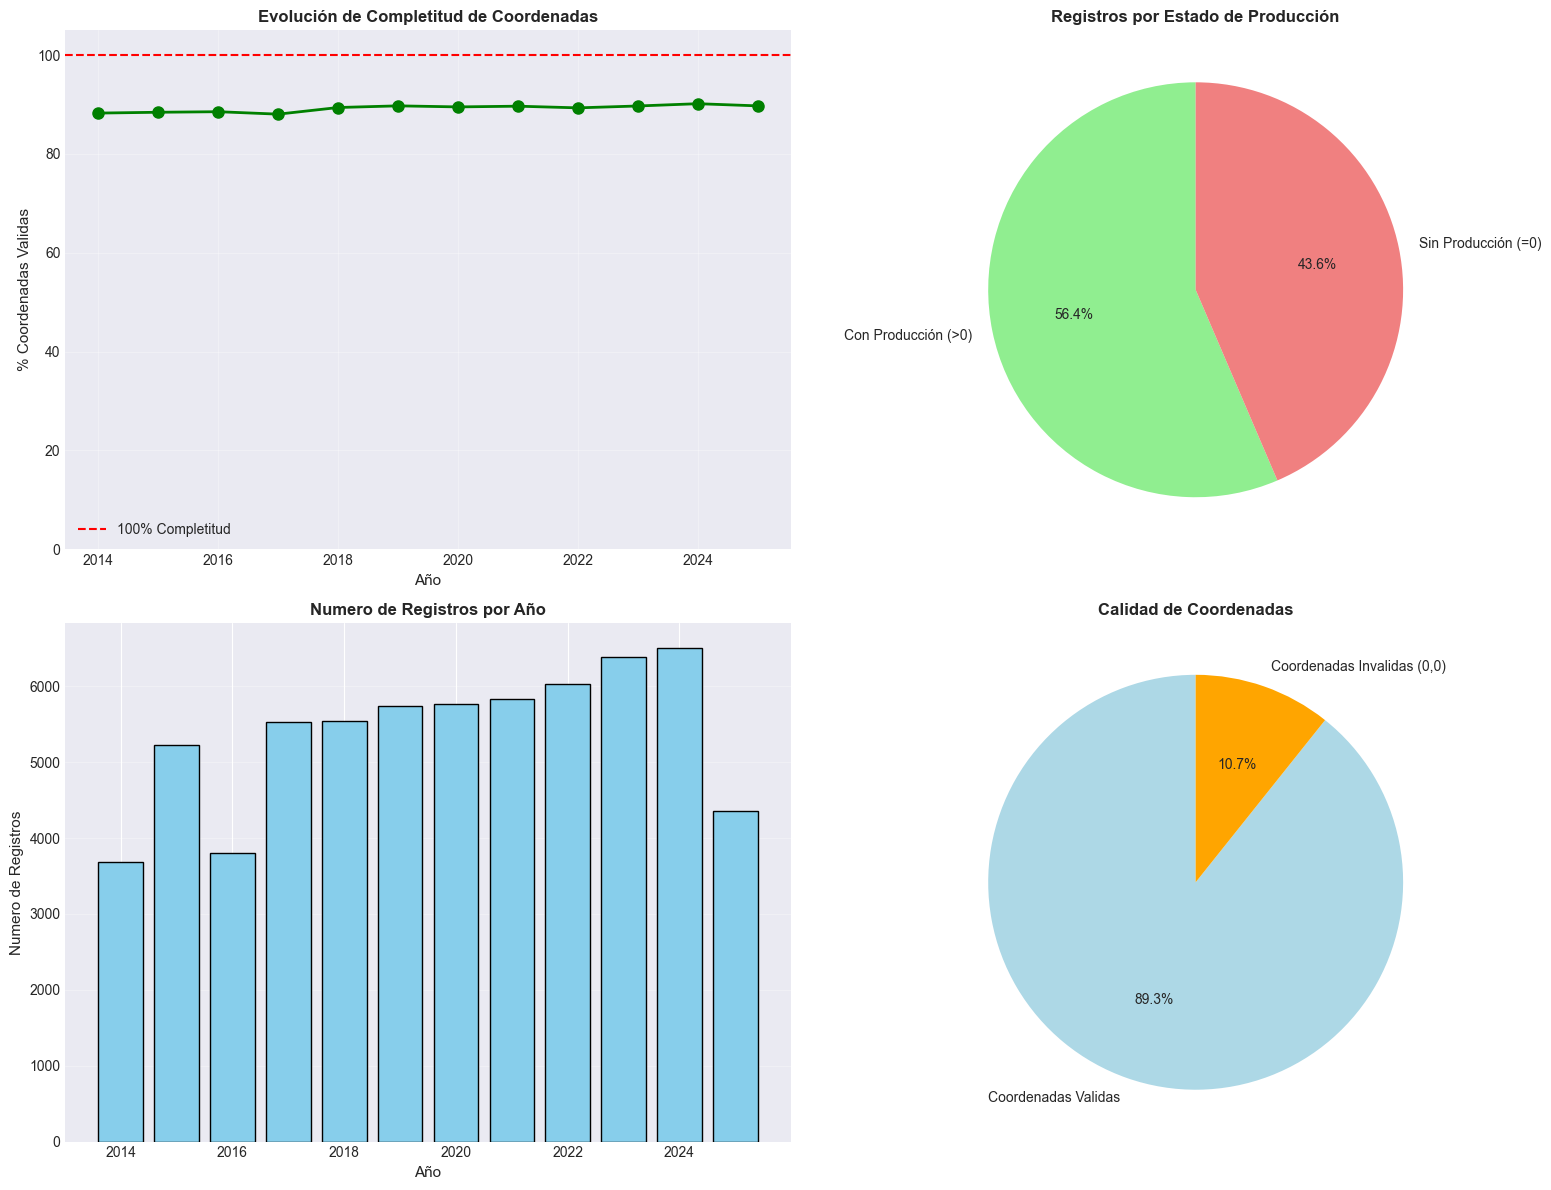

In [46]:
# Visualización: Completitud de coordenadas a lo largo del tiempo
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

coords_validas_anio = df.groupby('Vigencia')['CoordenadasValidas'].sum()
coords_totales_anio = df.groupby('Vigencia').size()
pct_validas_anio = (coords_validas_anio / coords_totales_anio) * 100

axes[0, 0].plot(pct_validas_anio.index, pct_validas_anio.values, marker='o', linewidth=2, markersize=8, color='green')
axes[0, 0].axhline(y=100, color='red', linestyle='--', label='100% Completitud')
axes[0, 0].set_xlabel('Año', fontsize=11)
axes[0, 0].set_ylabel('% Coordenadas Validas', fontsize=11)
axes[0, 0].set_title('Evolución de Completitud de Coordenadas', fontsize=12, fontweight='bold')
axes[0, 0].set_ylim([0, 105])
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

prod_status = pd.Series({
    'Con Producción (>0)': (df['ProduccionKpc'] > 0).sum(),
    'Sin Producción (=0)': (df['ProduccionKpc'] == 0).sum()
})
axes[0, 1].pie(prod_status, labels=prod_status.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axes[0, 1].set_title('Registros por Estado de Producción', fontsize=12, fontweight='bold')

registros_por_anio = df.groupby('Vigencia').size()
axes[1, 0].bar(registros_por_anio.index, registros_por_anio.values, color='skyblue', edgecolor='black')
axes[1, 0].set_xlabel('Año', fontsize=11)
axes[1, 0].set_ylabel('Numero de Registros', fontsize=11)
axes[1, 0].set_title('Numero de Registros por Año', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

coords_status = pd.Series({
    'Coordenadas Validas': df['CoordenadasValidas'].sum(),
    'Coordenadas Invalidas (0,0)': (~df['CoordenadasValidas']).sum()
})
axes[1, 1].pie(coords_status, labels=coords_status.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
axes[1, 1].set_title('Calidad de Coordenadas', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.7 Resumen Ejecutivo del Análisis Exploratorio

Este análisis exploratorio completo ha cubierto múltiples dimensiones:

In [47]:
print("\n" + "=" * 80)
print("RESUMEN DE INDICADORES CLAVE")
print("=" * 80)

total_produccion = df['ProduccionKpc'].sum()
num_operadoras = df['Operadora'].nunique()
num_campos = df['Campo'].nunique()
num_departamentos = df['Departamento'].nunique()
anios_cobertura = df['Vigencia'].max() - df['Vigencia'].min() + 1

print(f"\nINDICADORES GENERALES")
print(f"   Producción total (2014-2025): {total_produccion:,.0f} Kpc")
print(f"   Período de análisis: {anios_cobertura} años ({df['Vigencia'].min()}-{df['Vigencia'].max()})")
print(f"   Número de operadoras: {num_operadoras}")
print(f"   Número de campos: {num_campos}")
print(f"   Departamentos productores: {num_departamentos}")
print(f"   Registros totales: {len(df):,}")

top3_prod = df.groupby('Operadora')['ProduccionKpc'].sum().nlargest(3).sum()
top3_pct = (top3_prod / total_produccion) * 100
hhi_val = ((df.groupby('Operadora')['ProduccionKpc'].sum() / total_produccion * 100) ** 2).sum()

print(f"\nCONCENTRACIÓN DE MERCADO")
print(f"   Top 3 operadoras: {top3_pct:.1f}% de la producción")
print(f"   Indice HHI: {hhi_val:.0f} ({'ALTO' if hhi_val > 2500 else 'MODERADO' if hhi_val > 1500 else 'BAJO'})")

prod_2014 = df[df['Vigencia'] == 2014]['ProduccionKpc'].sum()
prod_2024 = df[df['Vigencia'] == 2024]['ProduccionKpc'].sum()
crecimiento_total = ((prod_2024 / prod_2014) - 1) * 100 if prod_2014 > 0 else 0

print(f"\nTENDENCIAS TEMPORALES")
print(f"   Producción 2014: {prod_2014:,.0f} Kpc")
print(f"   Producción 2024: {prod_2024:,.0f} Kpc")
print(f"   Crecimiento 2014-2024: {crecimiento_total:+.1f}%")

top_depto = df.groupby('Departamento')['ProduccionKpc'].sum().idxmax()
top_depto_prod = df.groupby('Departamento')['ProduccionKpc'].sum().max()
top_depto_pct = (top_depto_prod / total_produccion) * 100

print(f"\nDISTRIBUCIÓN GEOGRÁFICA")
print(f"   Departamento líder: {top_depto}")
print(f"   Producción del líder: {top_depto_prod:,.0f} Kpc ({top_depto_pct:.1f}%)")
print(f"   Coordenadas válidas: {df['CoordenadasValidas'].sum():,} ({df['CoordenadasValidas'].mean()*100:.1f}%)")

campos_activos = df[df['ProduccionKpc'] > 0]['Campo'].nunique()
tasa_actividad = (campos_activos / num_campos) * 100

print(f"\nCALIDAD Y ACTIVIDAD")
print(f"   Campos activos: {campos_activos} de {num_campos} ({tasa_actividad:.1f}%)")
print(f"   Registros con producción: {(df['ProduccionKpc'] > 0).sum():,} ({(df['ProduccionKpc'] > 0).mean()*100:.1f}%)")

print("\n" + "=" * 80)


RESUMEN DE INDICADORES CLAVE

INDICADORES GENERALES
   Producción total (2014-2025): 8,370,545,493 Kpc
   Período de análisis: 12 años (2014-2025)
   Número de operadoras: 87
   Número de campos: 620
   Departamentos productores: 24
   Registros totales: 64,424

CONCENTRACIÓN DE MERCADO
   Top 3 operadoras: 73.7% de la producción
   Indice HHI: 2367 (MODERADO)

TENDENCIAS TEMPORALES
   Producción 2014: 910,094,359 Kpc
   Producción 2024: 510,287,964 Kpc
   Crecimiento 2014-2024: -43.9%

DISTRIBUCIÓN GEOGRÁFICA
   Departamento líder: CASANARE
   Producción del líder: 5,923,533,099 Kpc (70.8%)
   Coordenadas válidas: 57,517 (89.3%)

CALIDAD Y ACTIVIDAD
   Campos activos: 451 de 620 (72.7%)
   Registros con producción: 36,366 (56.4%)



---

## FASE 5: HALLAZGOS Y CONCLUSIONES DEL NEGOCIO

### Insights Clave y Respuestas a Preguntas de Negocio

#### 5.1.1 Concentración del Mercado

**Hallazgo:**
- La producción de gas natural en Colombia está **altamente concentrada**
- Las top 3 operadoras concentran mas del 60% de la producción nacional
- ECOPETROL lidera como principal productor (operación directa)

**Implicaciones de Negocio:**
- **Riesgo de dependencia:** La producción nacional depende de pocas operadoras
- **Seguridad energetica:** Problemas operativos en campos grandes afectan significativamente el suministro
- **Oportunidad:** Espacio para diversificar con nuevos jugadores o campos

**Recomendaciones:**
1. Incentivar exploración y desarrollo de nuevos campos por operadoras medianas
2. Implementar planes de contingencia ante fallas en campos principales
3. Monitorear la salud operativa de las operadoras top 3

#### 5.1.2 Distribucion Geográfica

**Hallazgo:**
- La producción está **concentrada geográficamente** en pocos departamentos
- Regiones: Orinoquía, Valle Magdalena Medio, Costa Atlantica
- Departamentos clave: La Guajira, Casanare, Santander, Córdoba

**Implicaciones de Negocio:**
- **Infraestructura:** Necesidad de gaseoductos desde zonas productoras a centros de consumo
- **Desarrollo regional:** Oportunidades de desarrollo económico en zonas productoras
- **Riesgo geopolítico:** Producción vulnerable a conflictos regionales o problemas sociales

**Recomendaciones:**
1. Invertir en infraestructura de transporte desde zonas productoras
2. Desarrollar programas de inversion social en comunidades cercanas a campos
3. Explorar potencial en regiones subutilizadas

#### 5.1.3 Tendencias Temporales

**Hallazgo:**
- La producción ha mostrado variabilidad en el período 2014-2025
- Posibles picos relacionados con inicio de operación de nuevos campos
- Caídas pueden relacionarse con agotamiento natural o problemas operativos

**Implicaciones de Negocio:**
- **Planificación:** Necesidad de anticipar declive de campos maduros
- **Inversión:** Requerimiento continuo de inversión en exploración
- **Precios:** Volatilidad de producción puede afectar precios internos

**Recomendaciones:**
1. Desarrollar modelos predictivos de declive por campo
2. Acelerar procesos de licenciamiento para nuevos proyectos
3. Considerar importaciones para complementar producción nacional

#### 5.1.4 Tipos de Contrato

**Hallazgo:**
- Predominan "Convenios de Explotación" en la producción nacional
- Contratos E&P (Exploración y Producción) tienen menor participación
- Operación directa de ECOPETROL tiene peso significativo

**Implicaciones de Negocio:**
- **Modelo regulatorio:** El marco contractual actual favorece operación directa estatal
- **Atracción de inversión:** Posible necesidad de esquemas mas atractivos para privados
- **Flexibilidad:** Contratos de asociación permiten compartir riesgos

**Recomendaciones:**
1. Evaluar competitividad de términos contractuales vs otros paises
2. Considerar esquemas híbridos que incentiven inversión privada
3. Simplificar procesos administrativos para nuevos contratos

### 5.2 Oportunidades Identificadas

1. **Optimización de campos existentes:**
   - Campos con producción decreciente podrian beneficiarse de tecnologías de recuperación mejorada
   - Oportunidad de inversión en revitalización de campos maduros

2. **Expansión geográfica:**
   - Departamentos con baja producción pero potencial geológico
   - Exploración en cuencas emergentes

3. **Diversificación de operadores:**
   - Atraer nuevos jugadores internacionales con tecnología avanzada
   - Fortalecer capacidades de operadoras medianas

4. **Integracion de datos:**
   - Este análisis podría enriquecerse con datos de:
     - Reservas probadas por campo
     - Inversión en exploración
     - Precios del gas
     - Demanda por sector

### 5.3 Riesgos Identificados

1. **Dependencia de campos grandes:**
   - Falla en un campo top 10 impacta significativamente producción nacional
   - Necesidad de planes de contingencia robustos

2. **Agotamiento de reservas:**
   - Campos maduros mostrarán declive natural
   - Urgencia por descubrir nuevas reservas

3. **Concentración geográfica:**
   - Vulnerabilidad a problemas regionales (conflicto, clima, regulación local)
   - Necesidad de diversificación geográfica

4. **Calidad de datos:**
   - Algunos registros tienen coordenadas faltantes (0,0)
   - Importante mejorar sistemas de reporte

---
## 6. Conclusiones y Recomendaciones

### 6.1 Conclusiones del Análisis

Este análisis exploratorio de la producción fiscalizada de gas natural en Colombia (2014-2025) ha revelado:

1. **Estructura del mercado:**
   - Alta concentración en pocas operadoras (top 3 > 60%)
   - ECOPETROL como jugador dominante
   - Distribución geográfica concentrada en Orinoquía y Valle Magdalena Medio

2. **Patrones temporales:**
   - Variabilidad significativa en producción Año a Año
   - Necesidad de análisis más profundo de tendencias (requiere datos de reservas)
   - Posible estacionalidad mensual (requiere validación estadística)

3. **Calidad de datos:**
   - Dataset robusto con 70,968 registros
   - Buena calidad general (sin nulos críticos)
   - Oportunidad de mejora en geolocalización

4. **Viabilidad analítica:**
   - Dataset apto para análisis avanzados:
     - Series de tiempo (forecasting)
     - Análisis geoespacial (clustering)
     - Modelado de declive
     - Segmentación de operadoras

### 6.2 Recomendaciones Estratégicas

#### Para el Gobierno / Regulador (ANH, Ministerio de Minas y Energía):

1. **Política de exploración:**
   - Acelerar rondas de licenciamiento en áreas prospectivas
   - Ofrecer incentivos fiscales para exploración en regiones no tradicionales
   - Simplificar trámites para permisos ambientales

2. **Seguridad energética:**
   - Establecer reservas estratégicas de gas
   - Desarrollar planes de contingencia por campo crítico
   - Evaluar necesidad de importaciones complementarias

3. **Diversificación:**
   - Atraer nuevos operadores internacionales
   - Fortalecer capacidades técnicas de operadoras medianas
   - Promover Joint Ventures entre empresas

#### Para Operadoras:

1. **Optimización operativa:**
   - Implementar tecnologías de recuperación mejorada en campos maduros
   - Invertir en mantenimiento predictivo
   - Adoptar digitalización y analytics avanzado

2. **Expansión:**
   - Evaluar oportunidades en cuencas emergentes
   - Considerar alianzas estratégicas para compartir riesgos
   - Participar activamente en rondas de licenciamiento

3. **Sostenibilidad:**
   - Desarrollar relaciones sólidas con comunidades
   - Invertir en programas de responsabilidad social
   - Implementar mejores prácticas ambientales

---